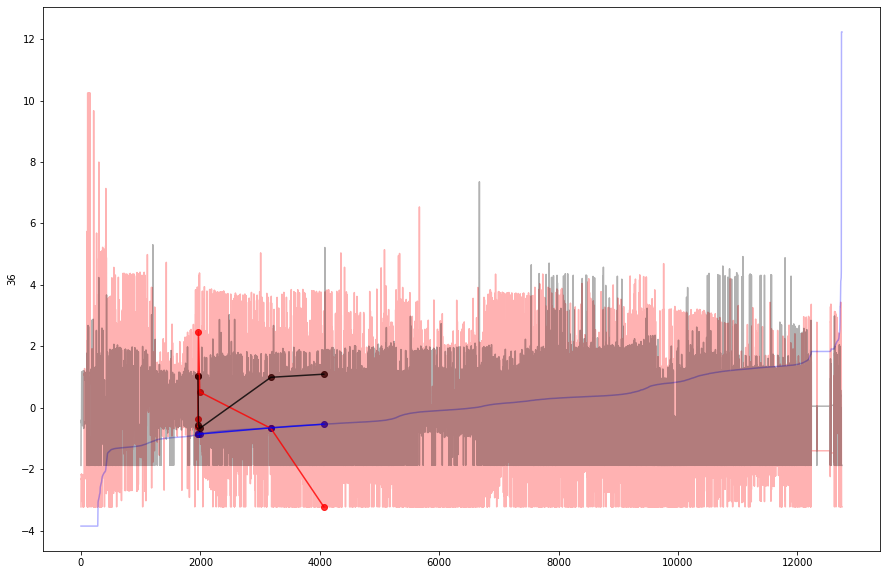

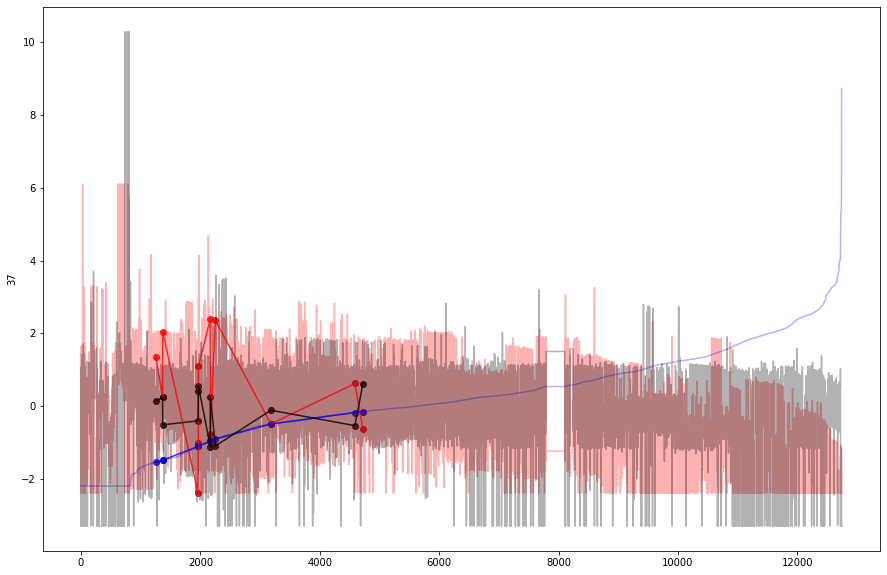

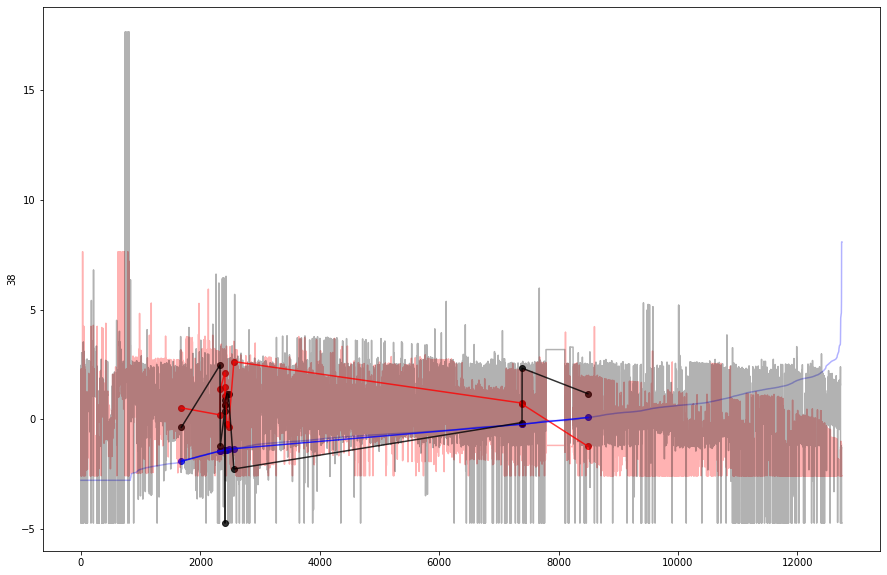

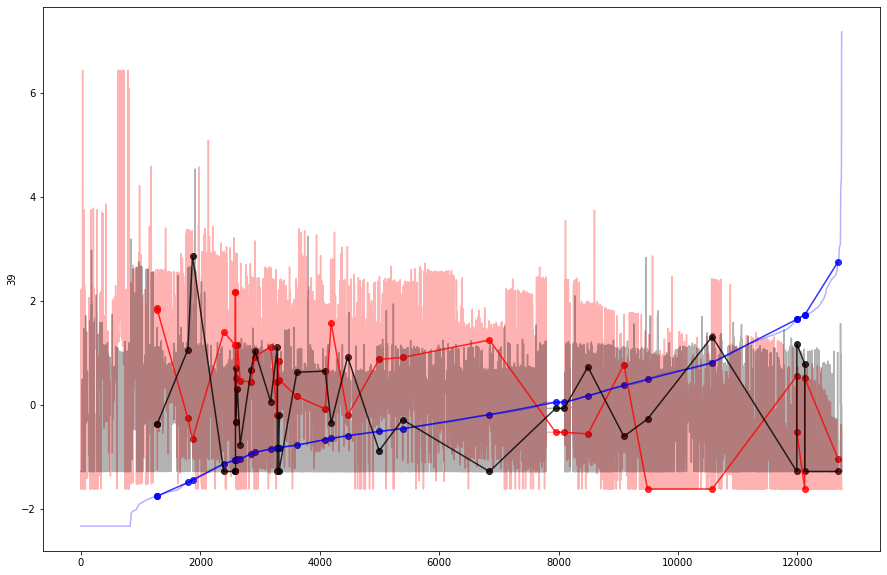

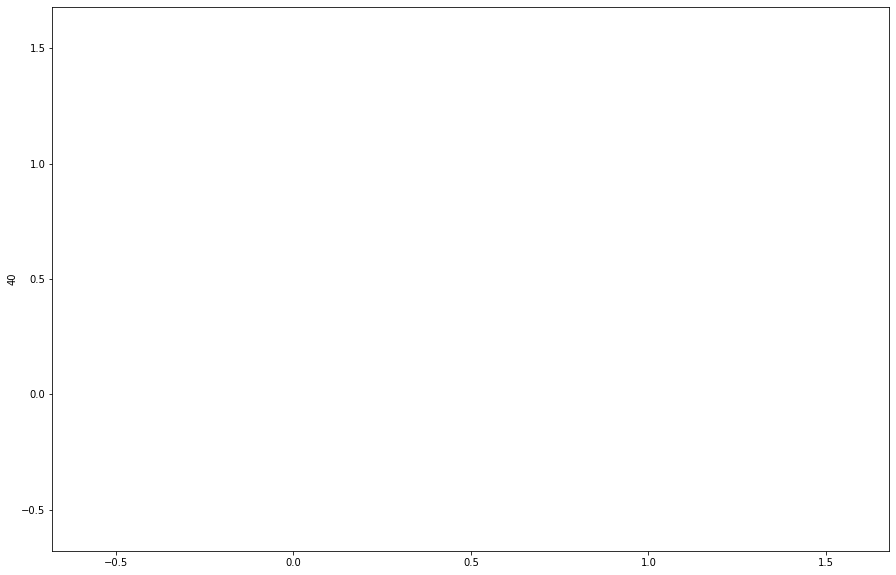

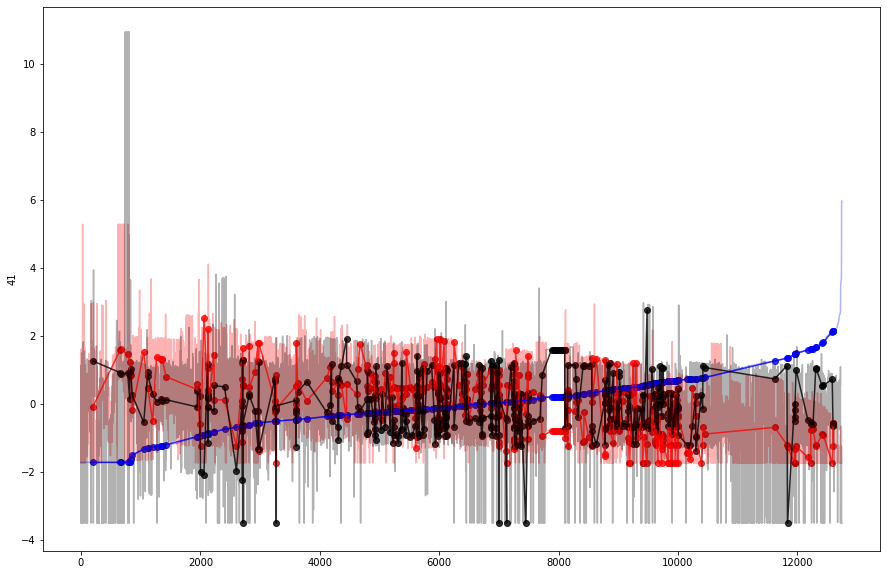

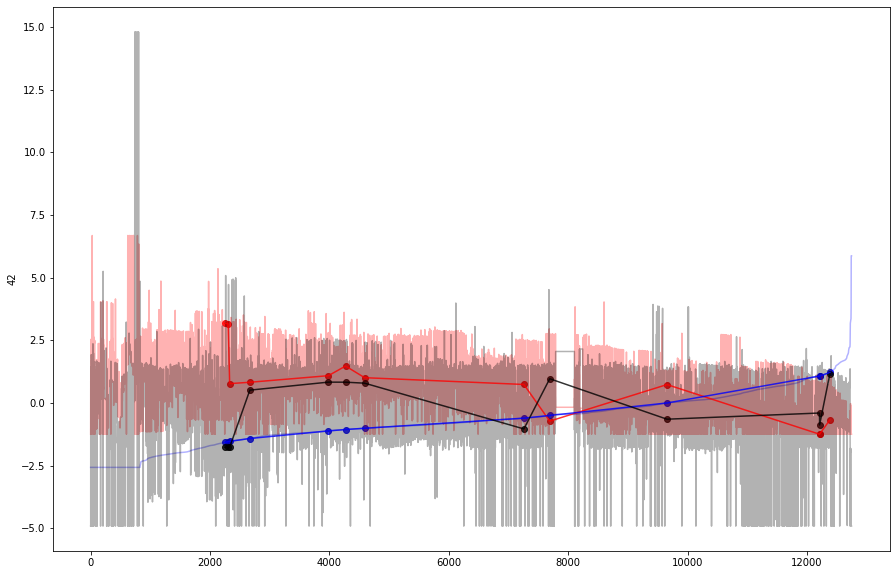

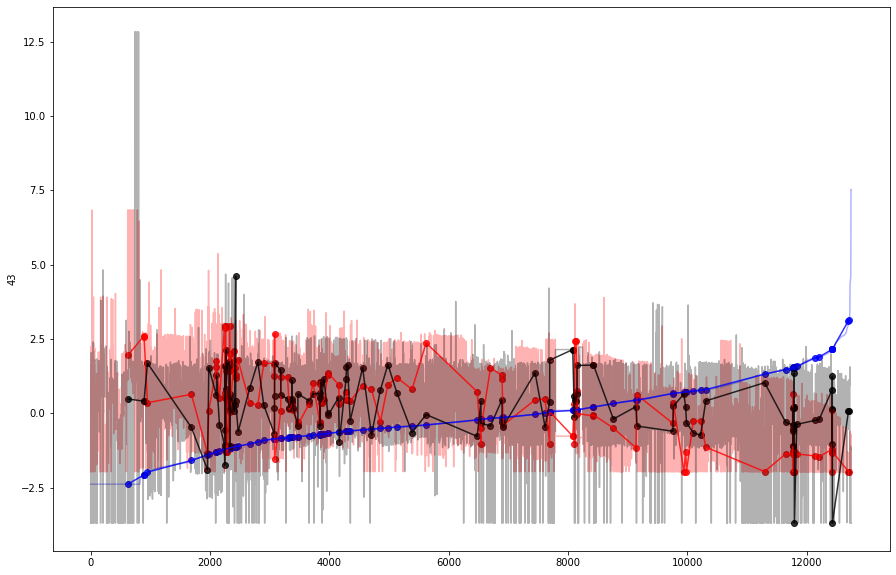

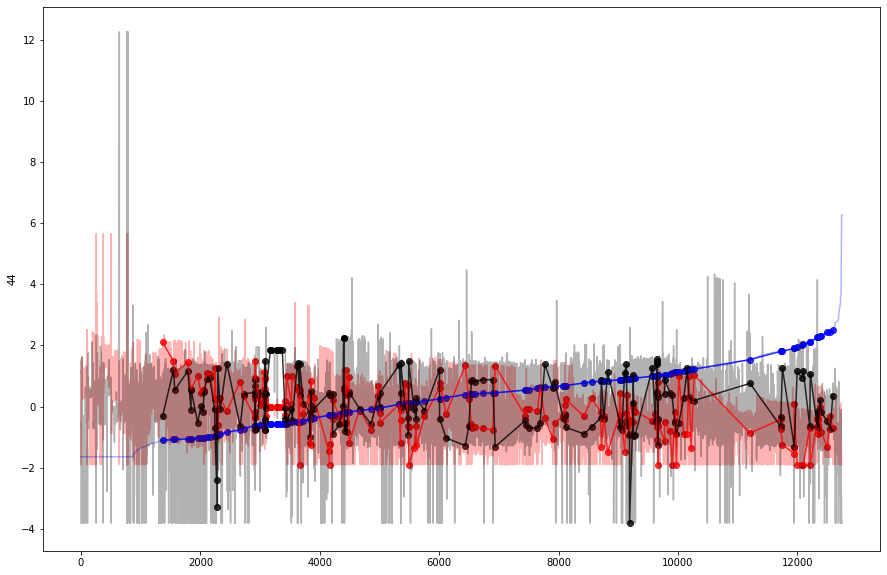

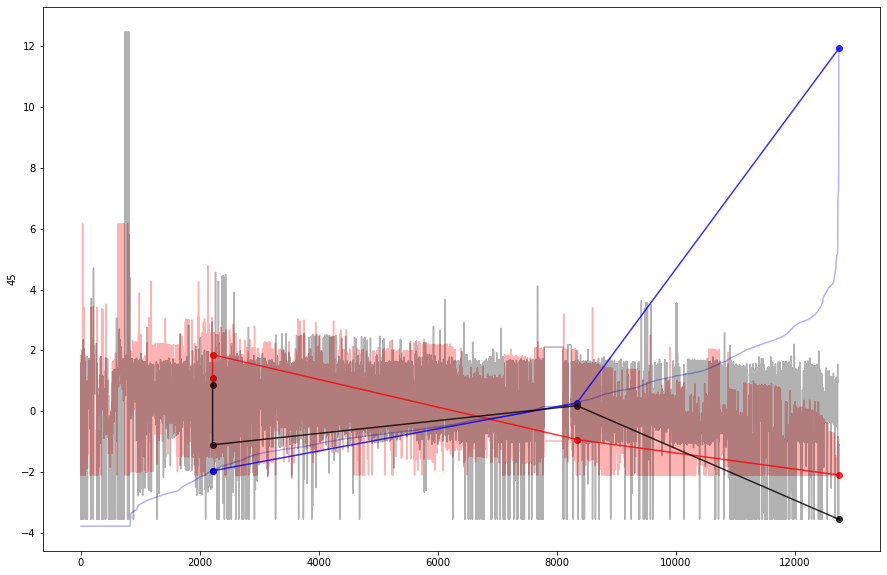

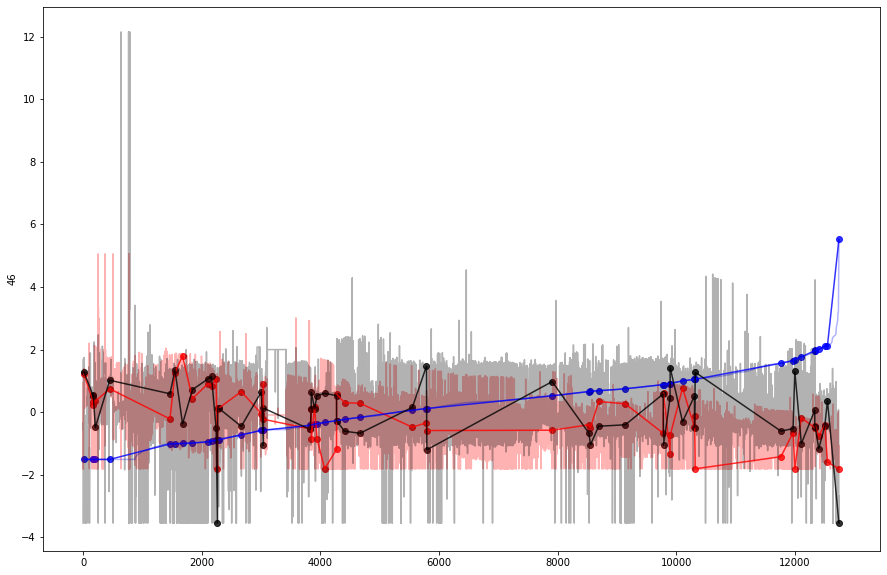

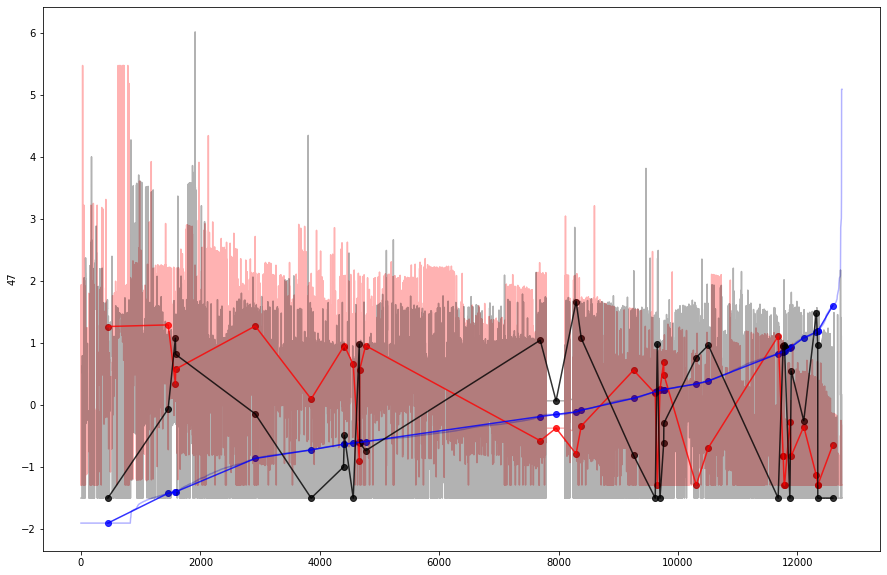

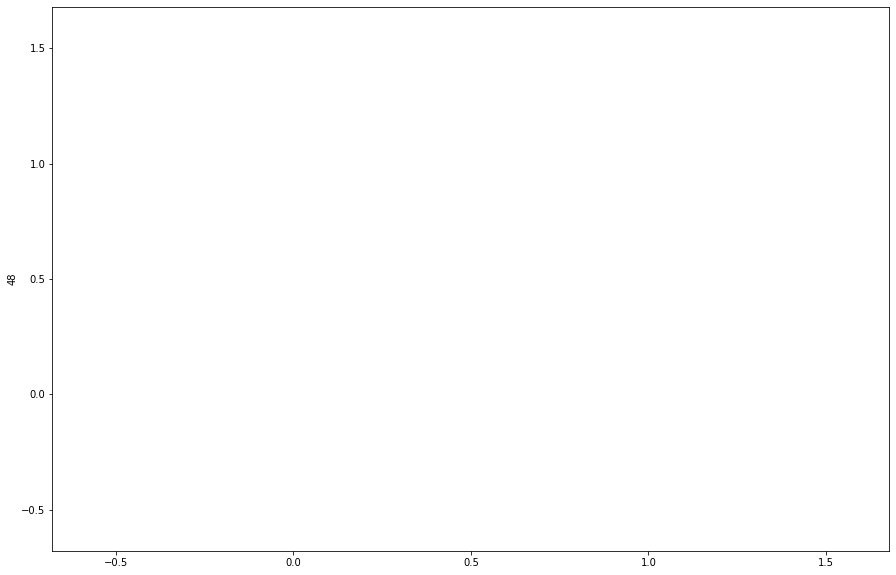

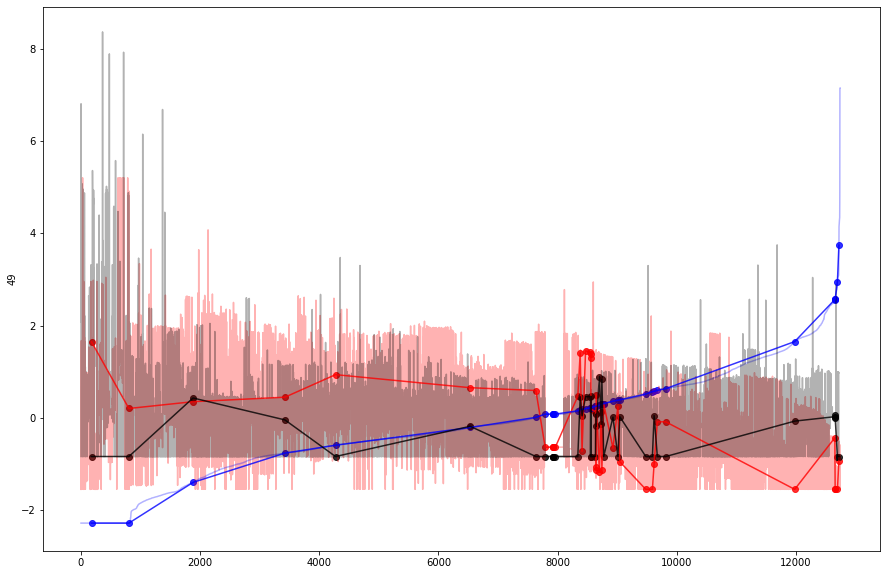

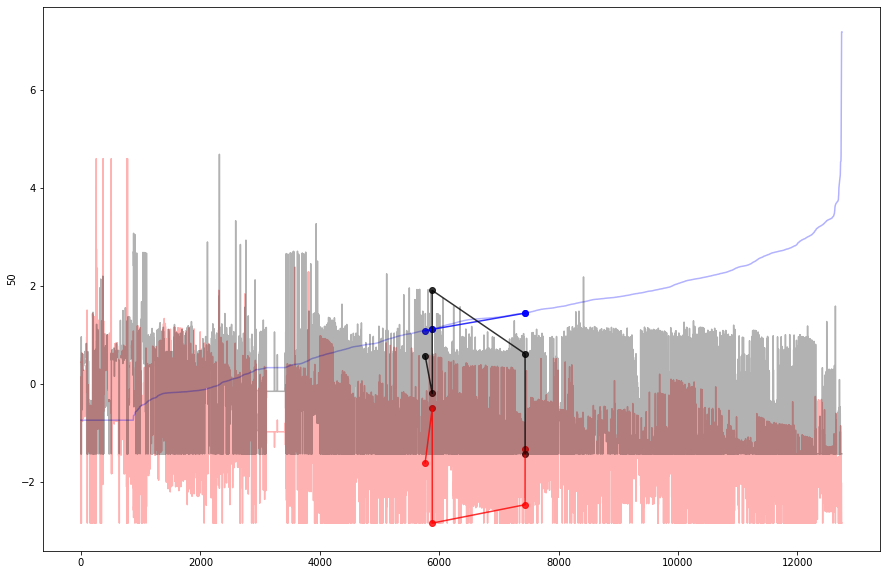

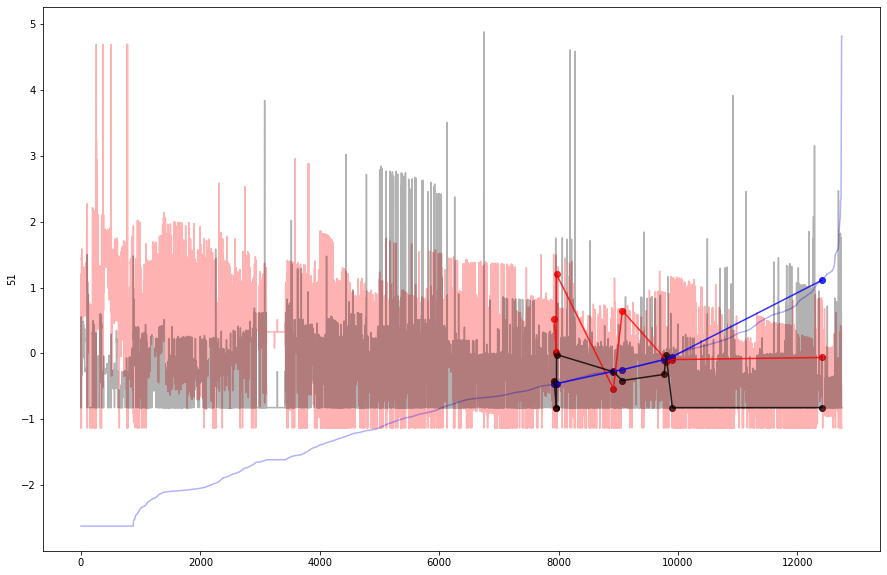

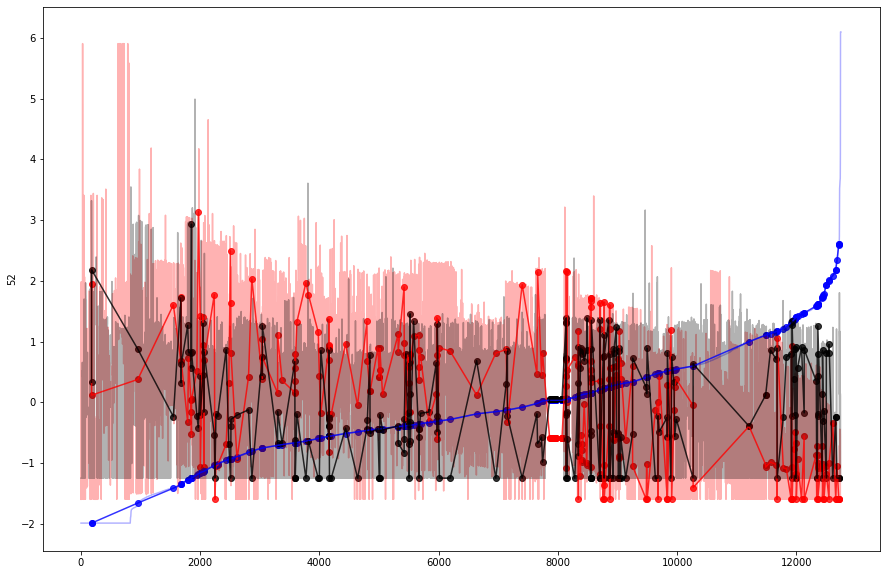

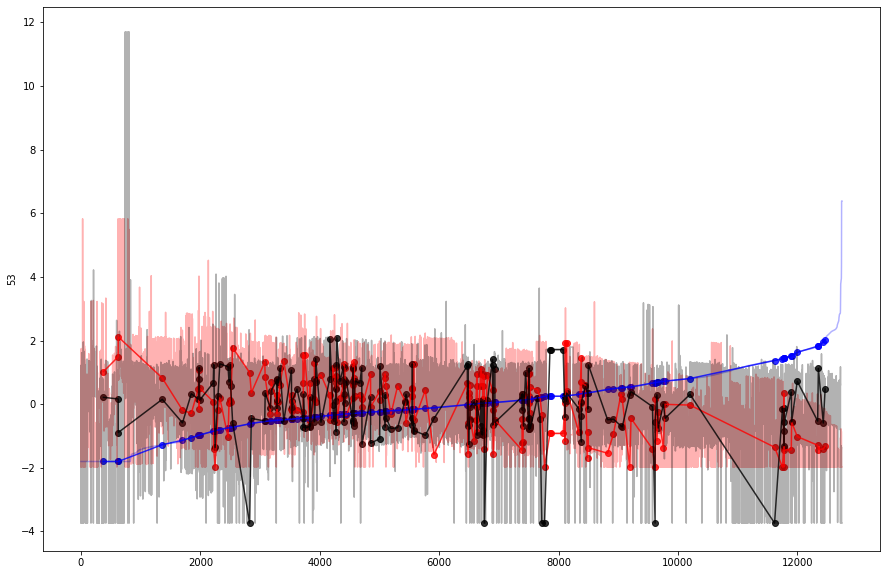

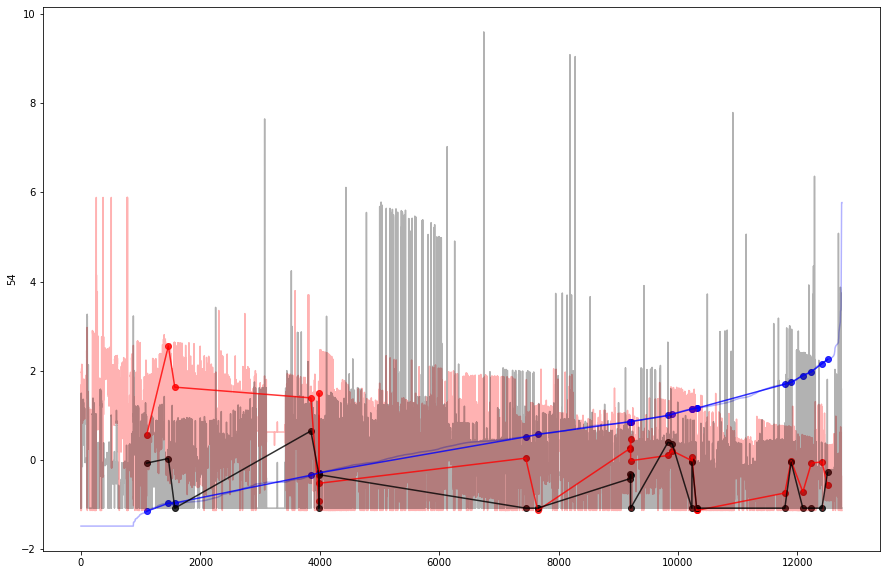

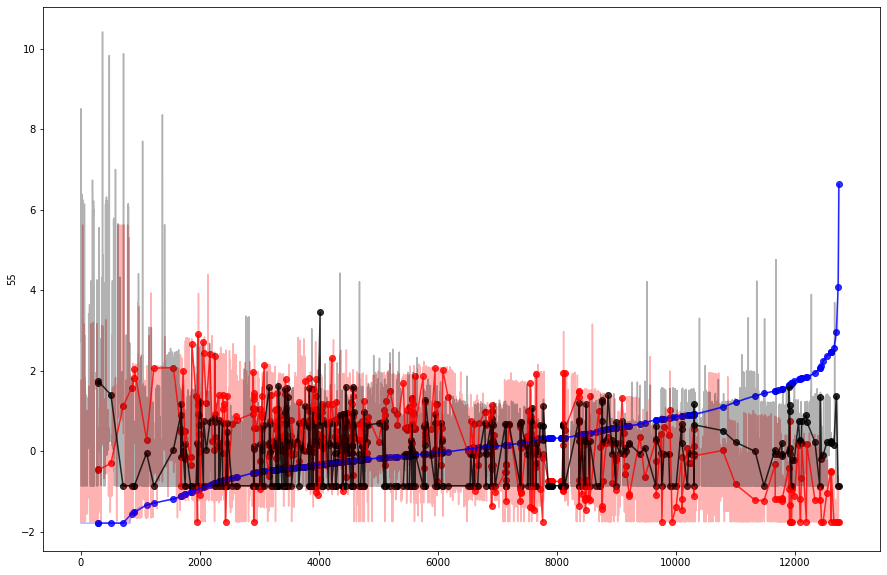

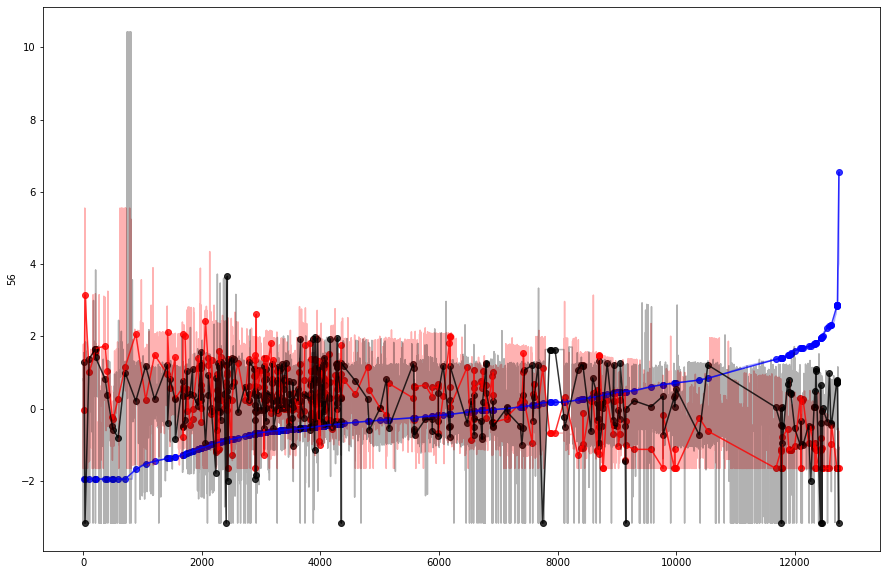

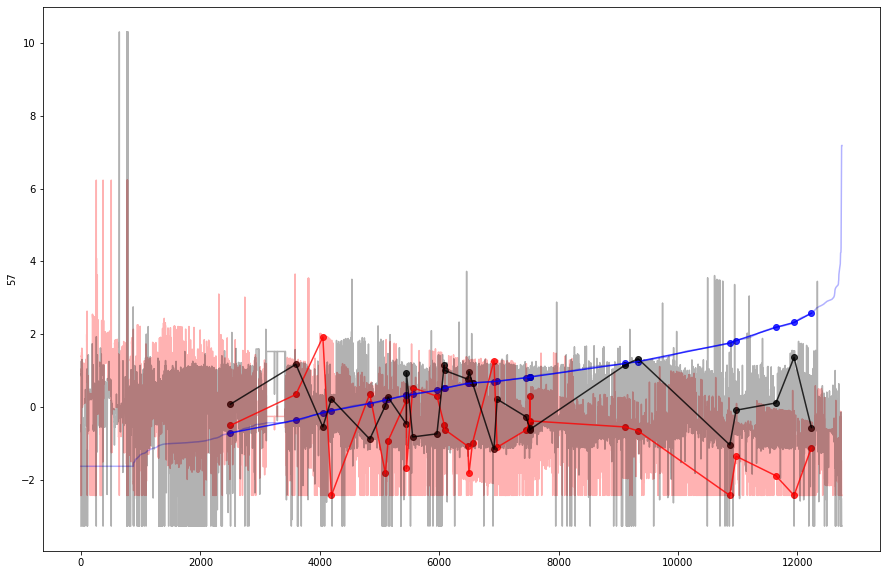

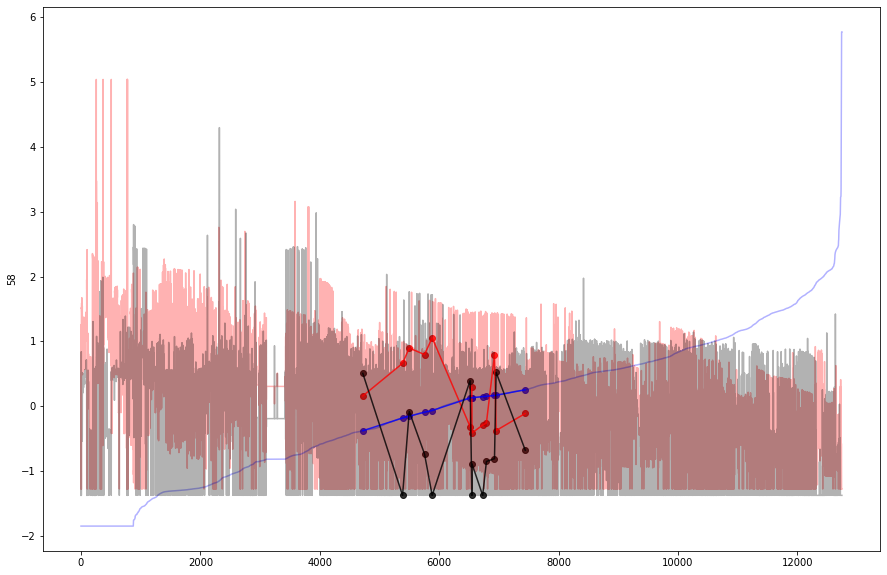

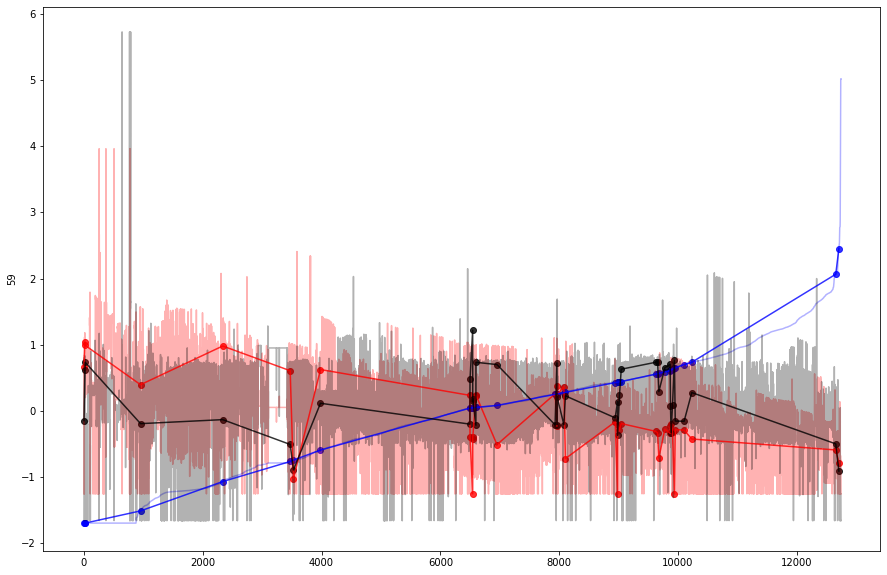

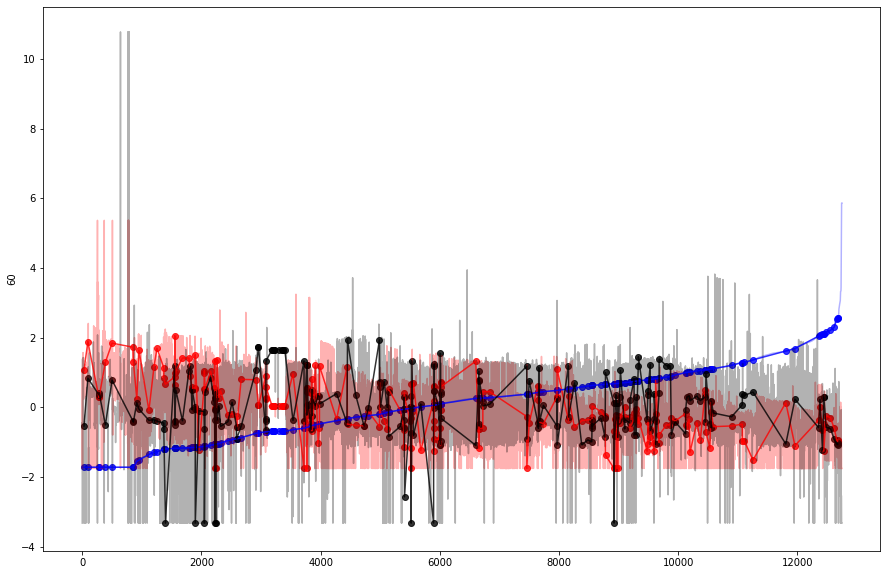

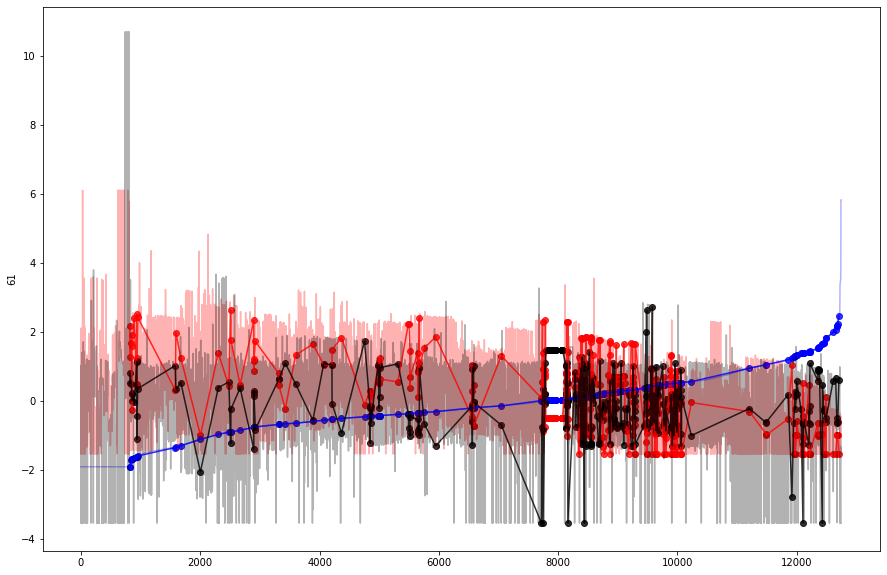

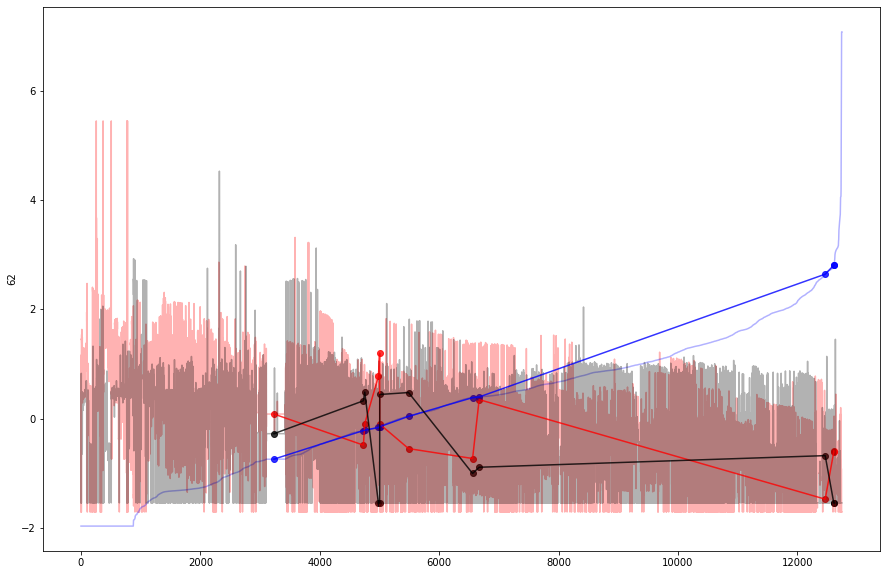

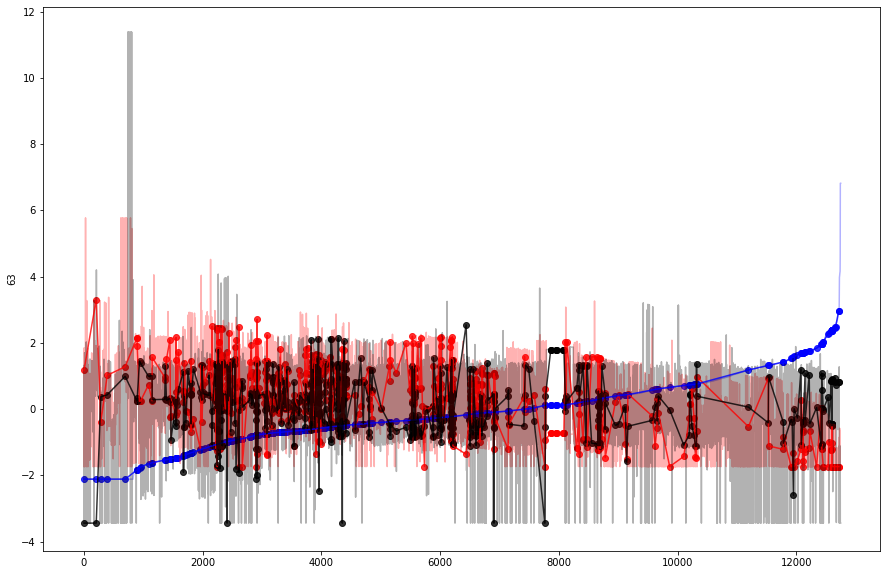

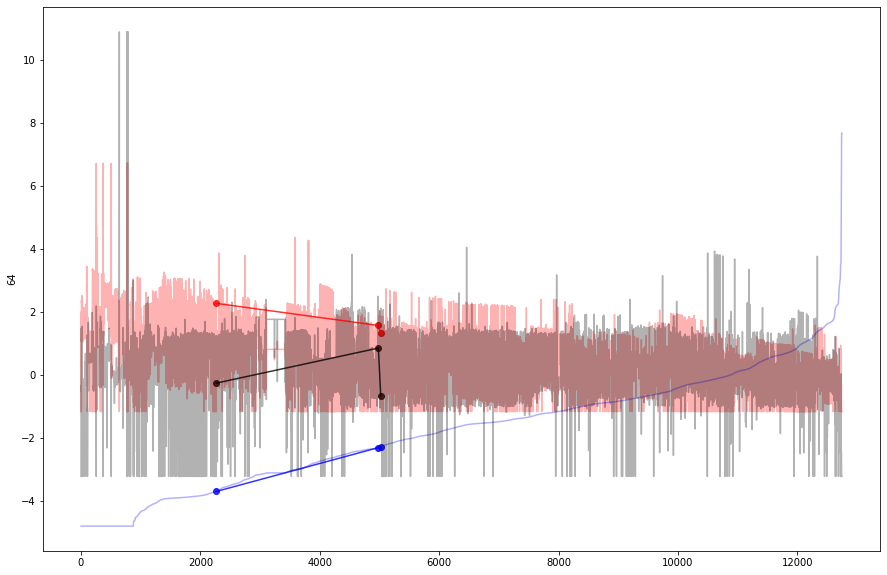

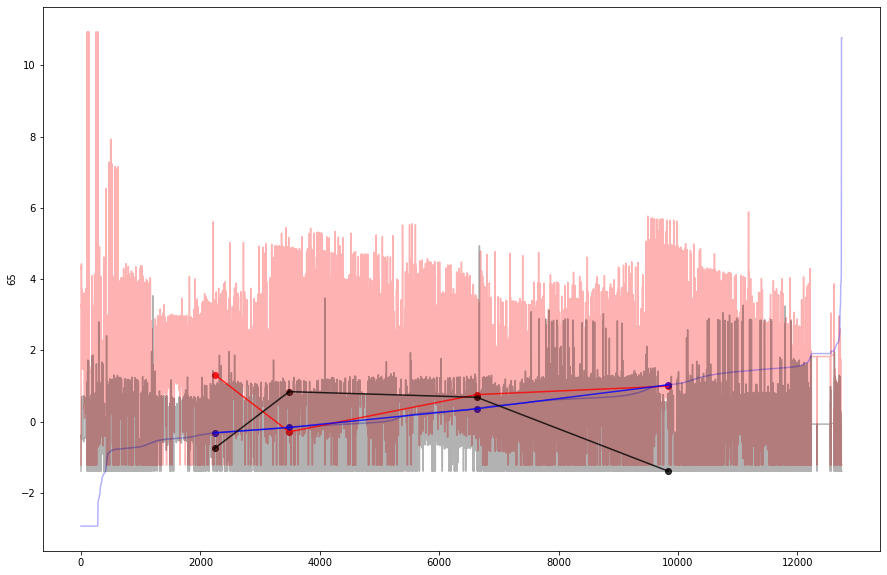

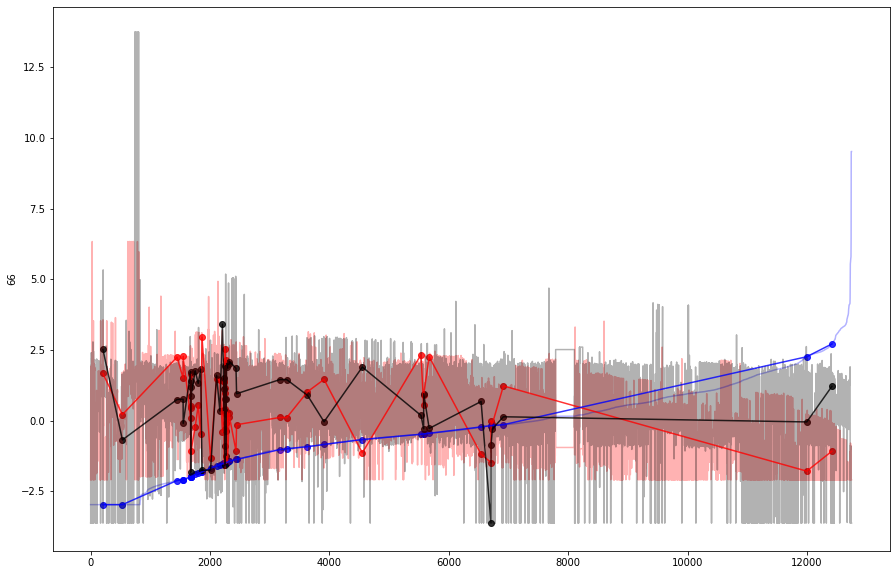

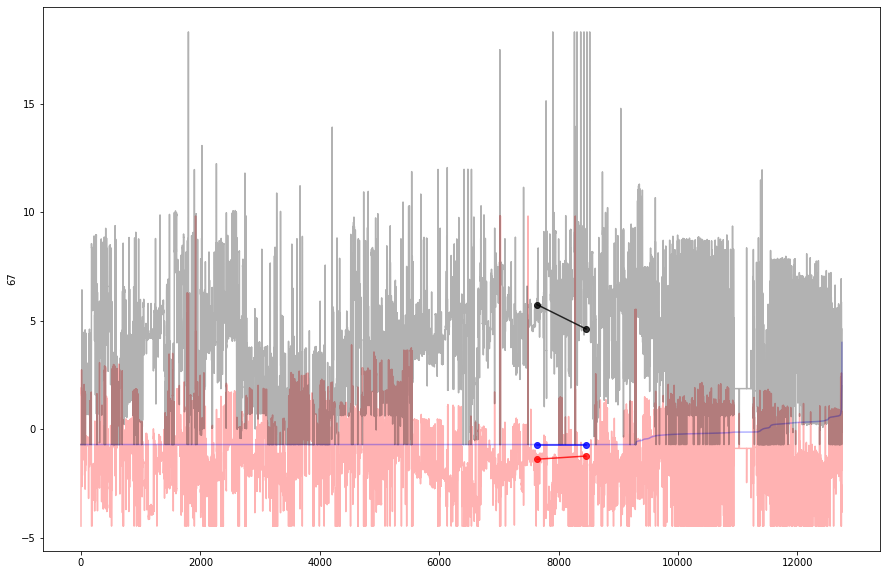

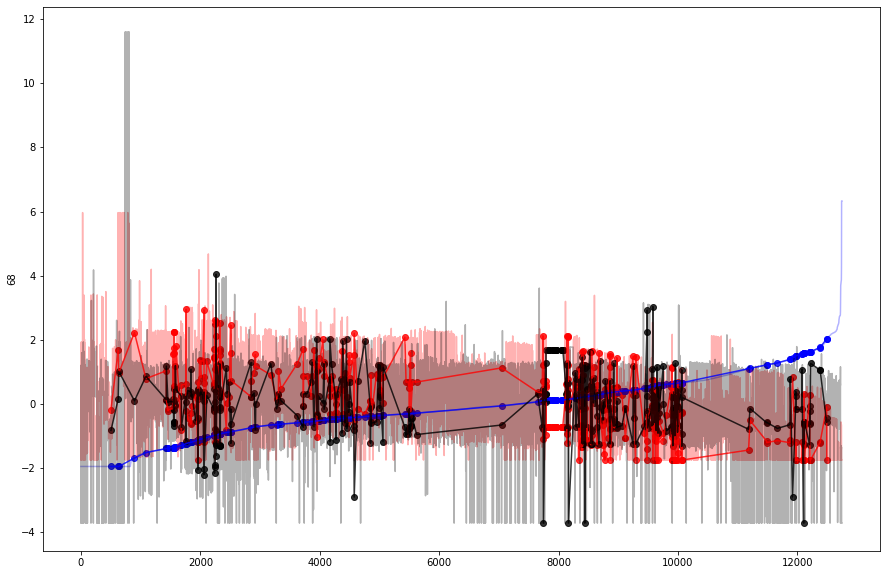

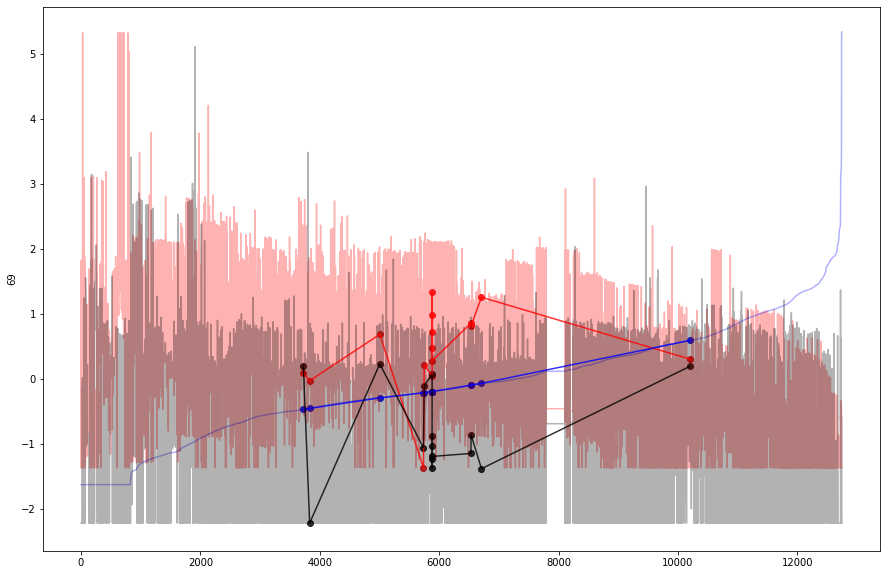

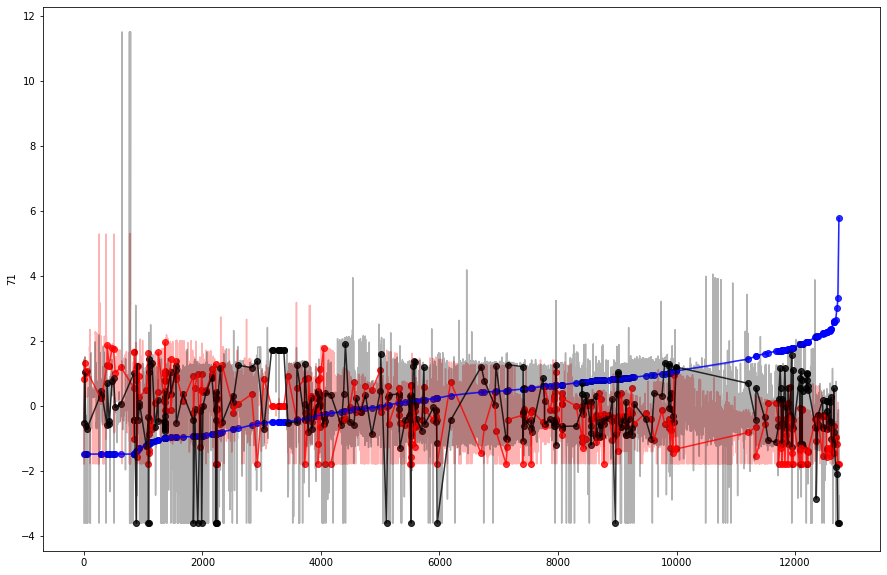

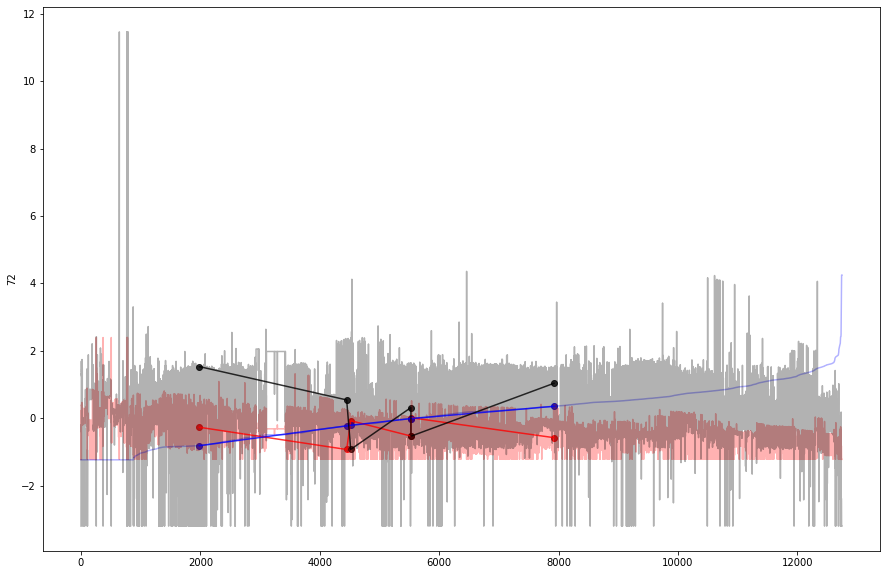

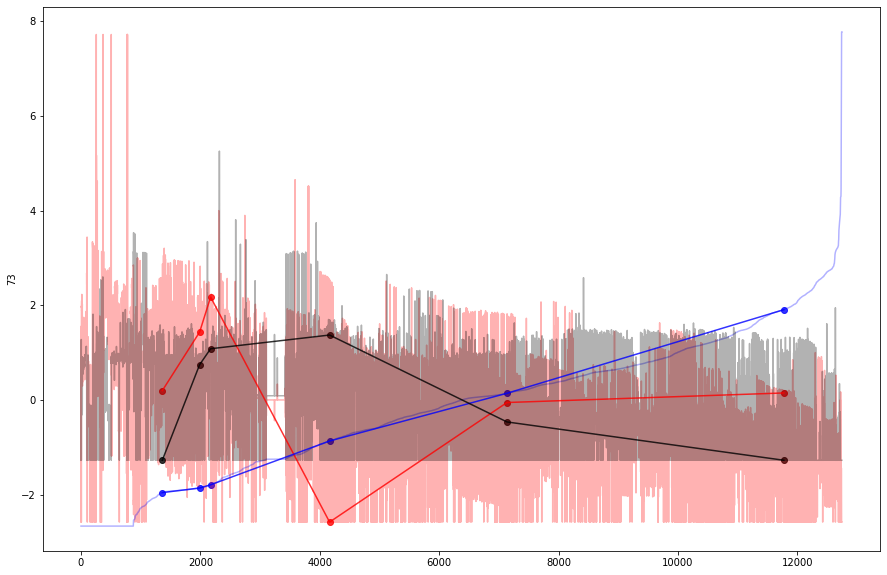

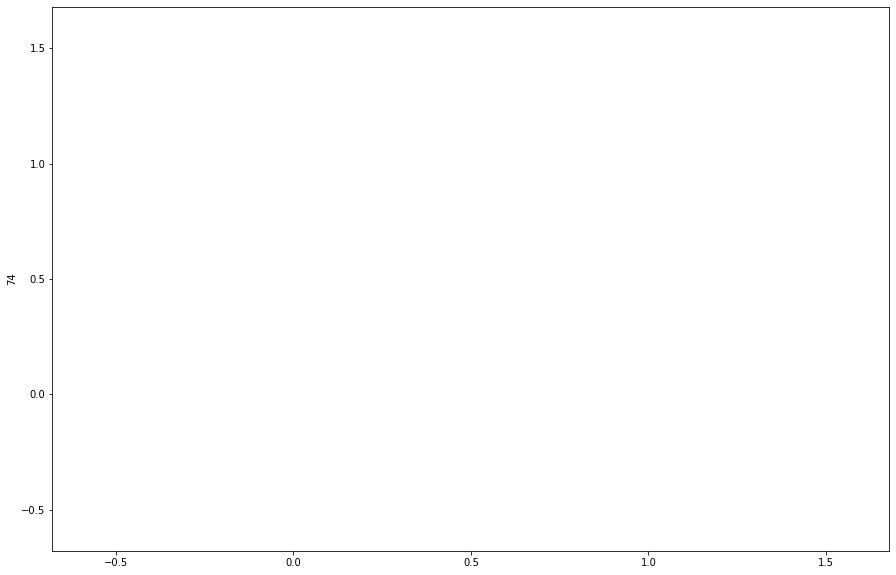

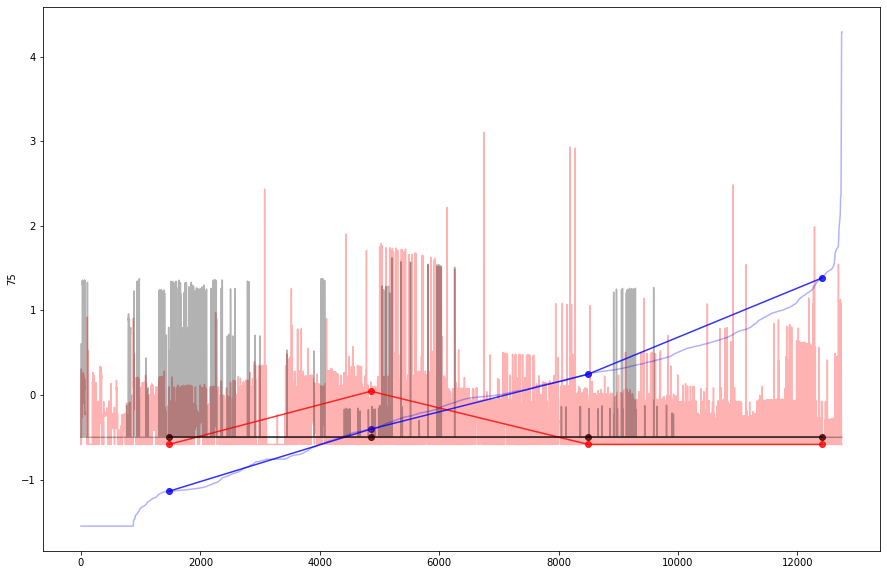

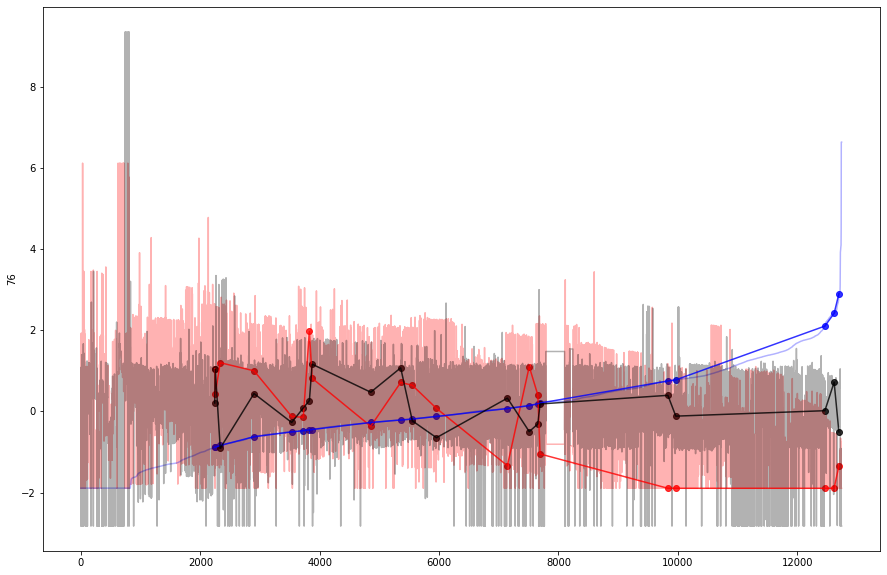

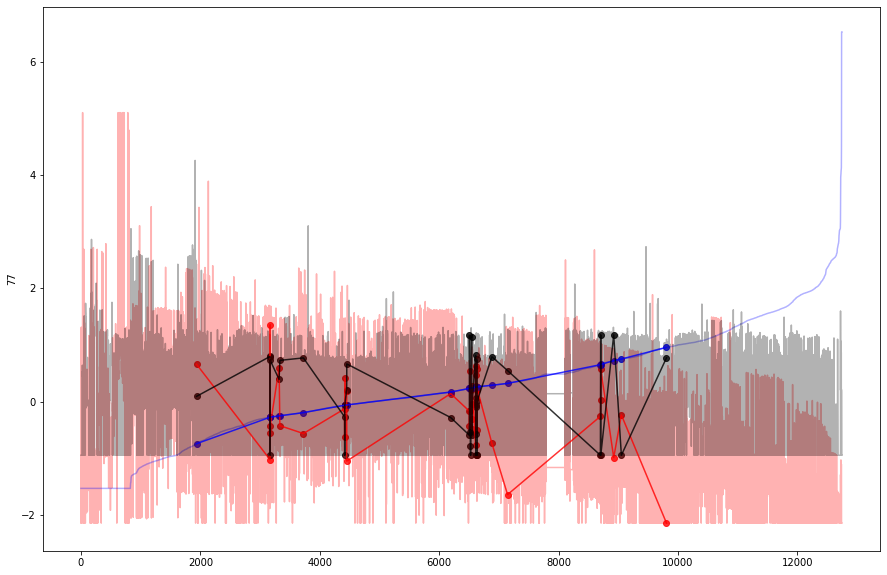

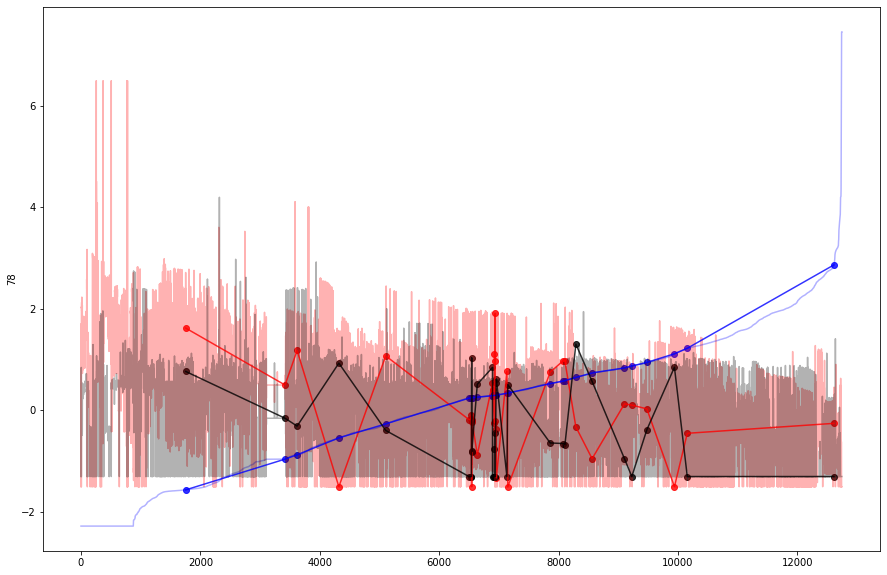

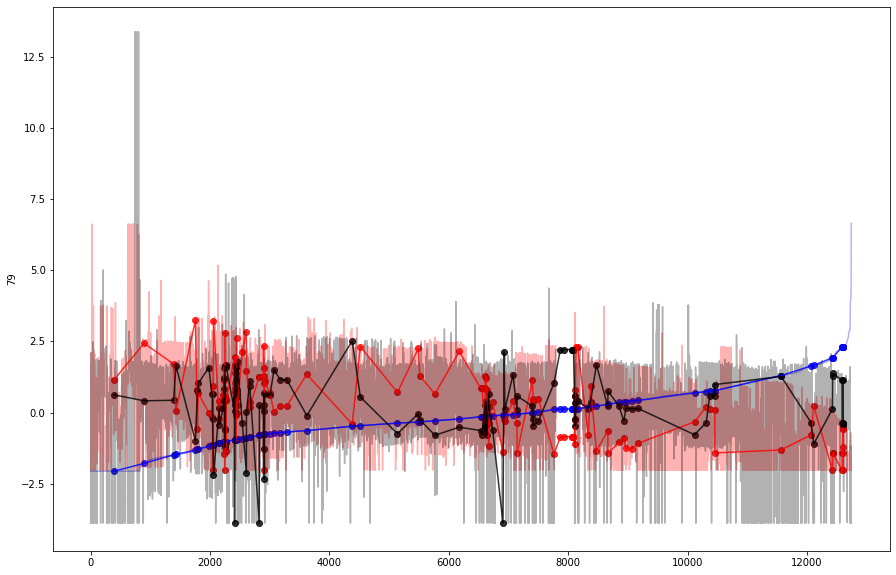

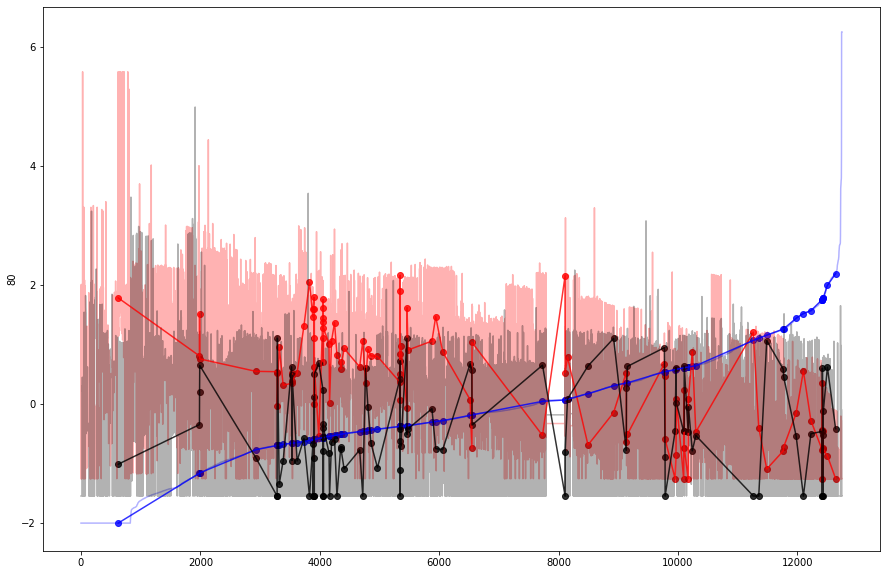

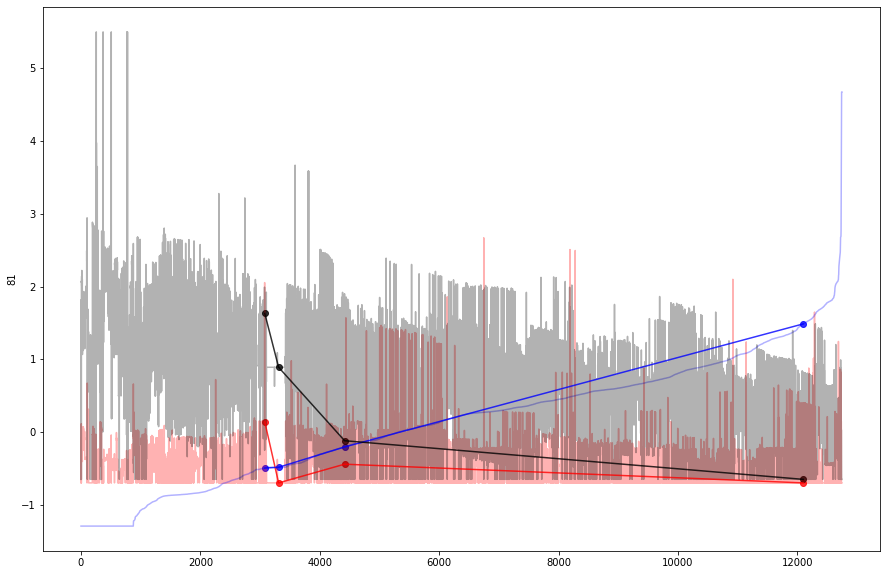

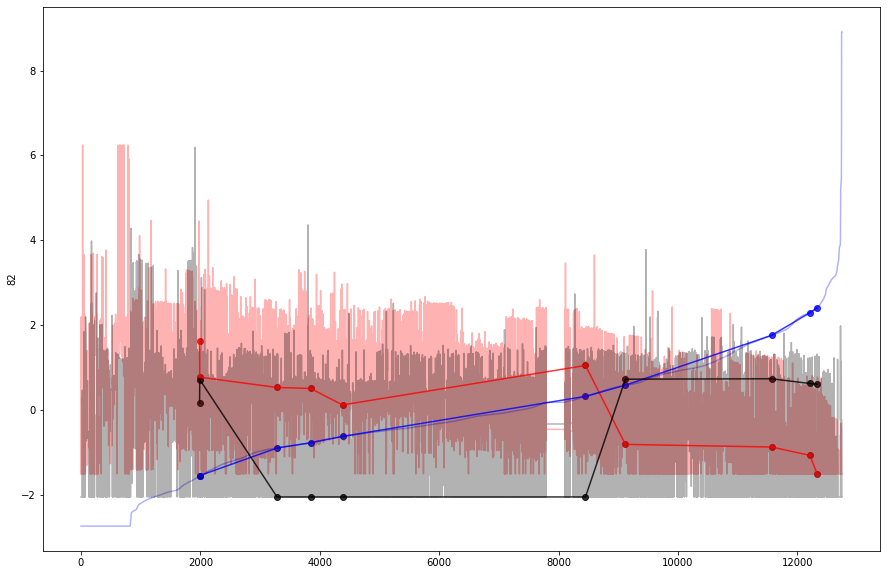

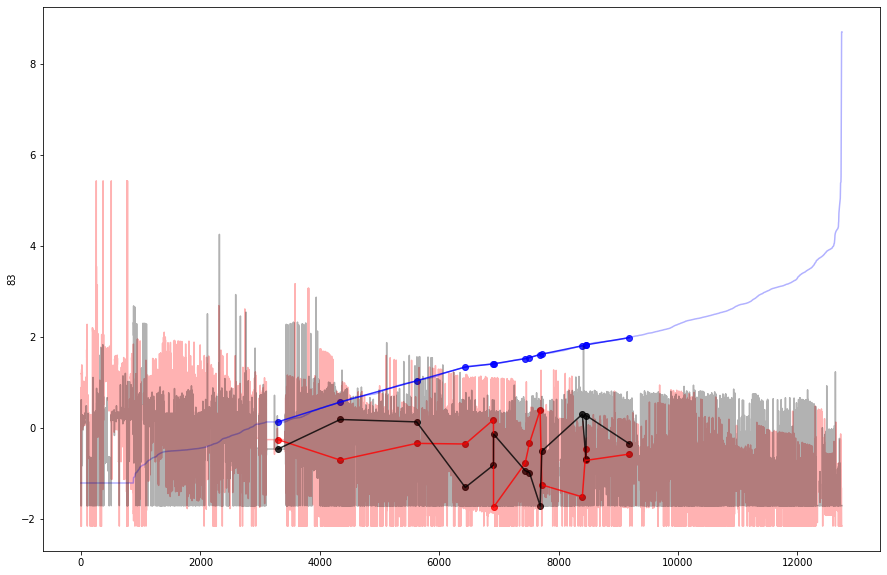

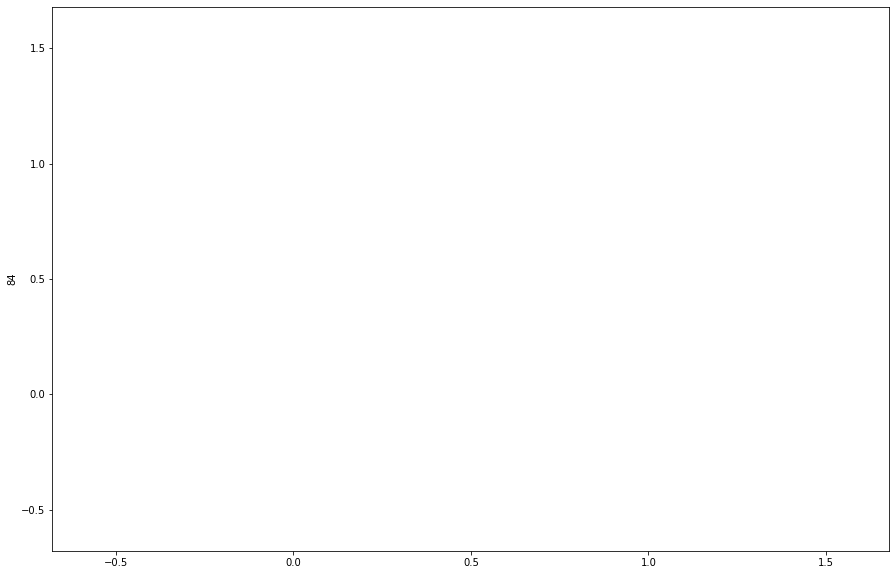

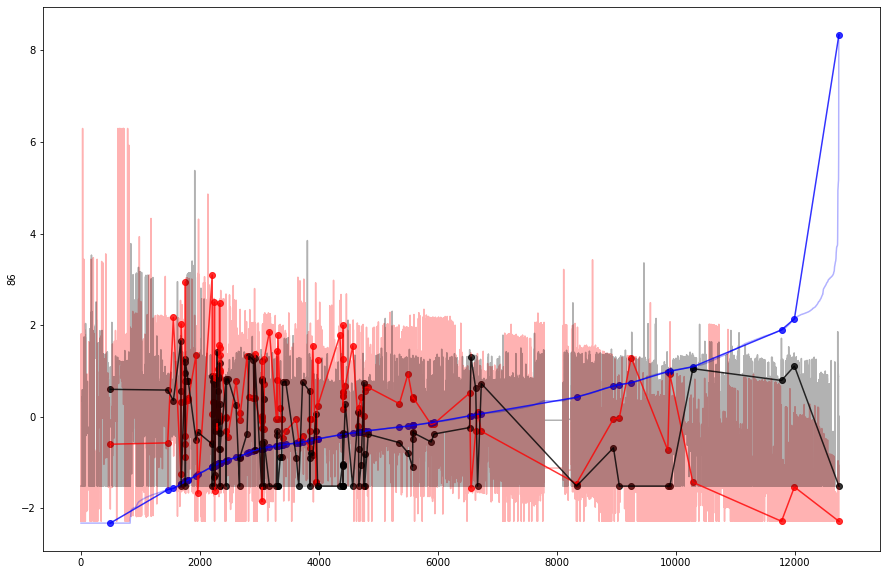

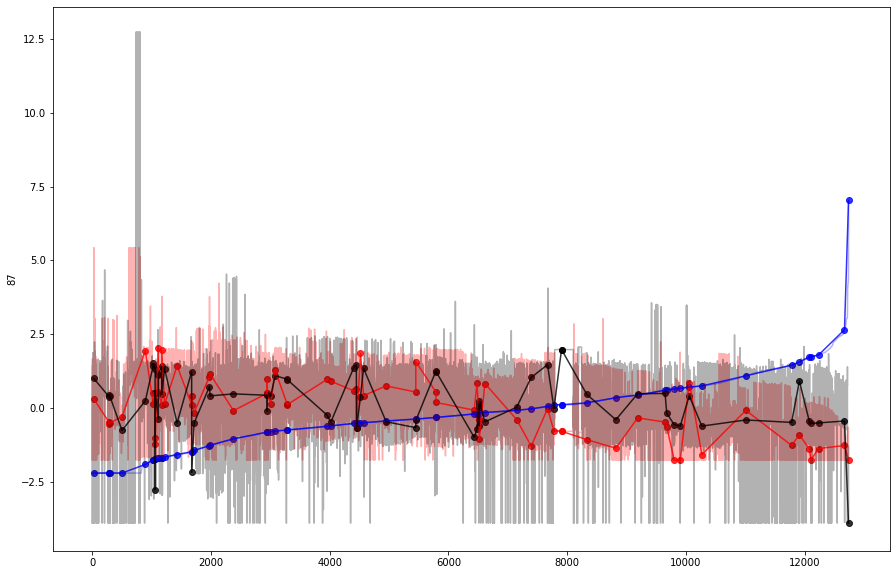

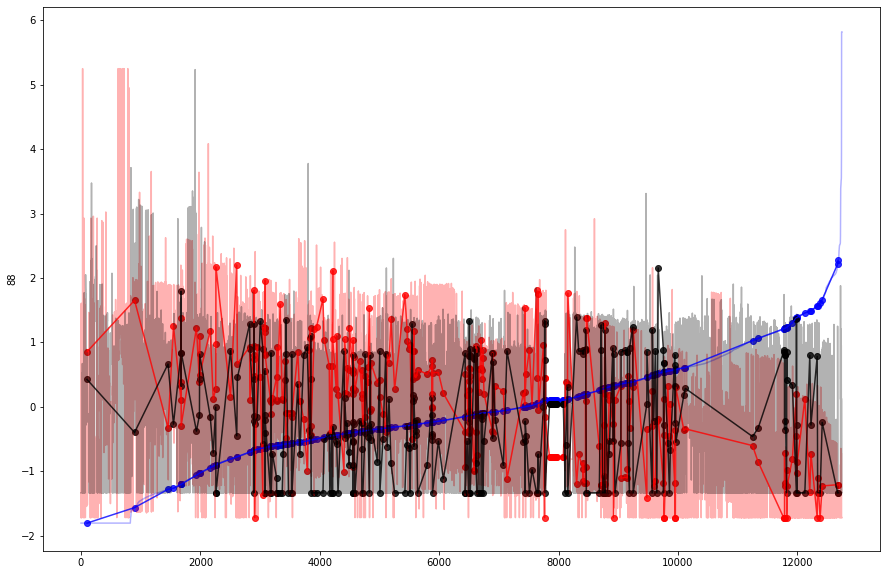

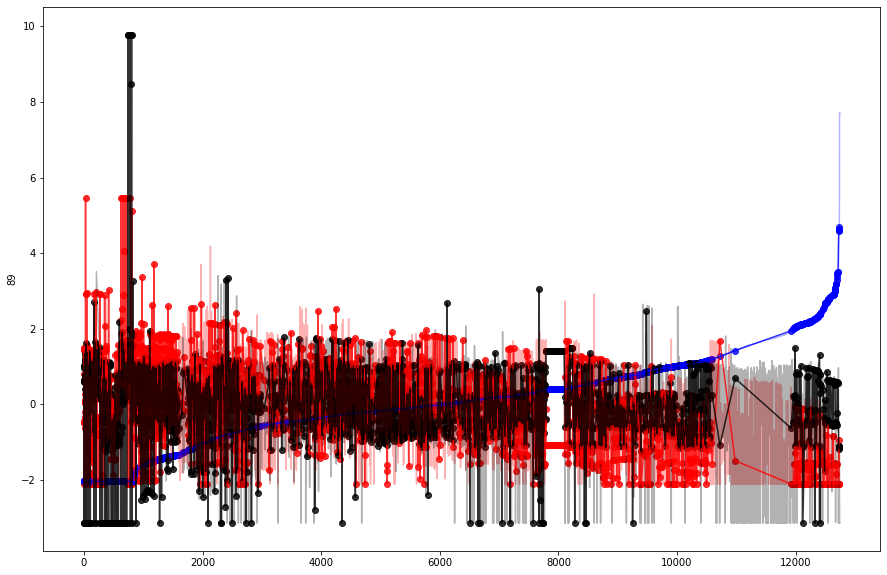

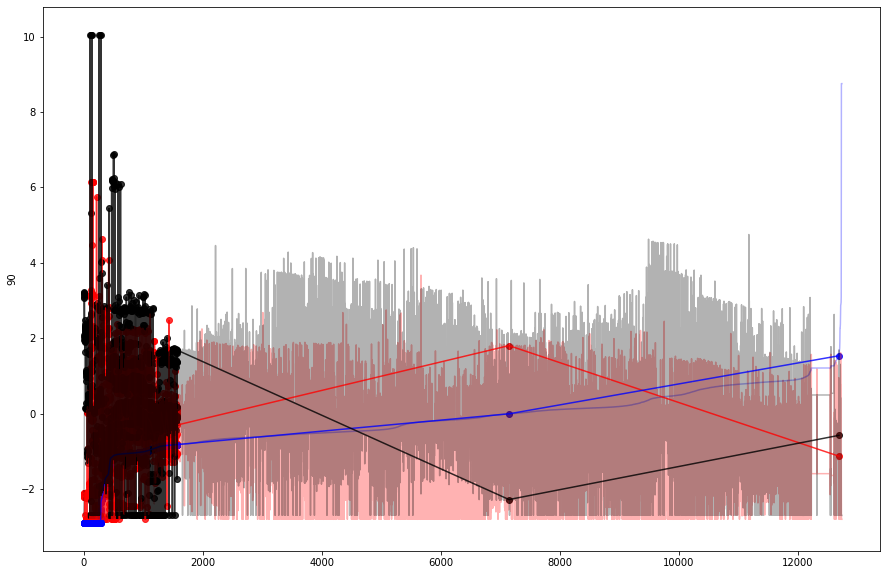

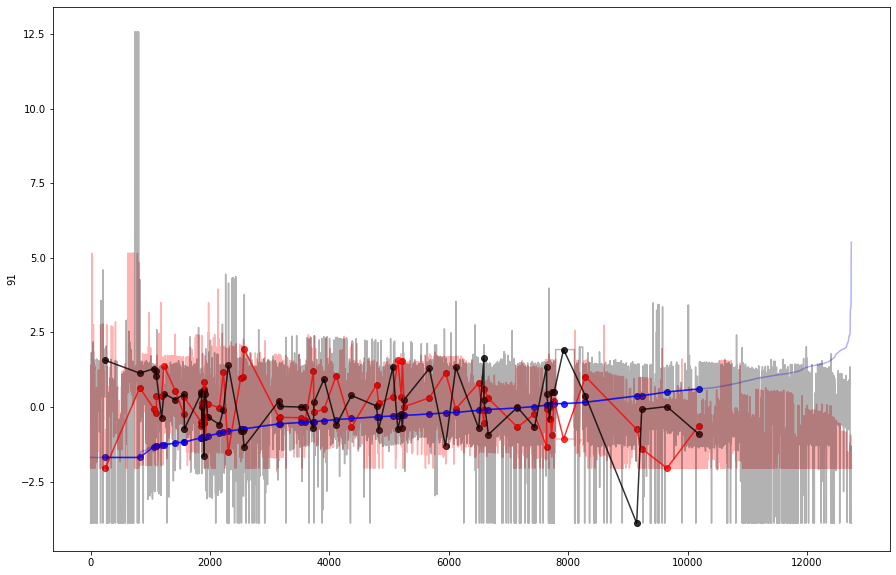

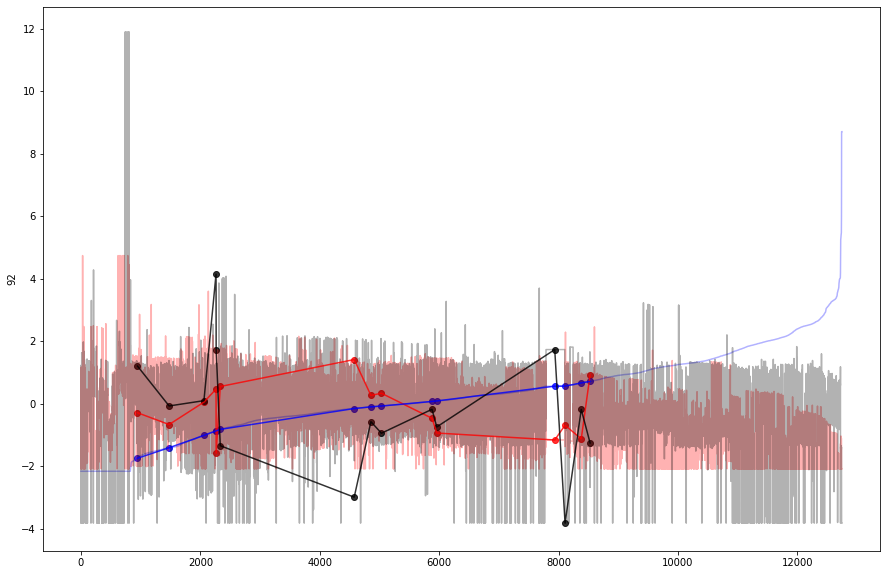

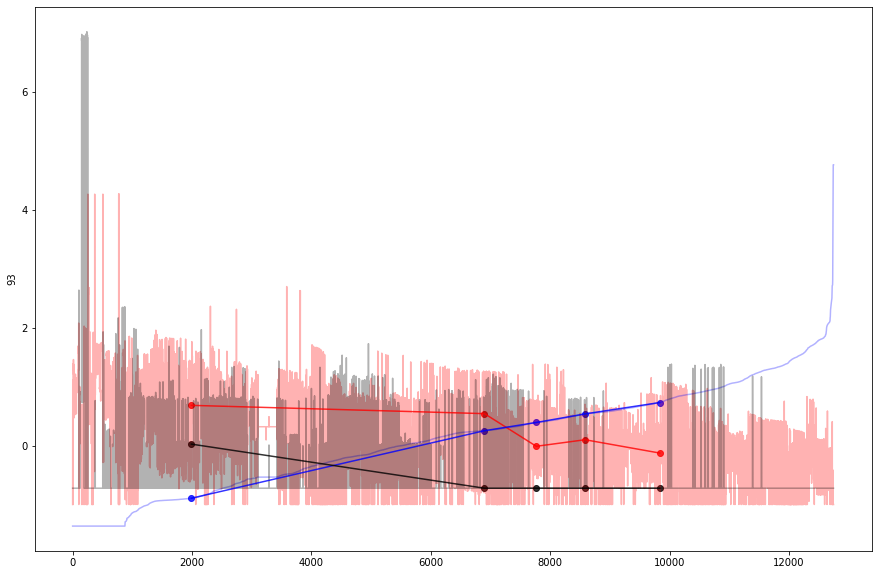

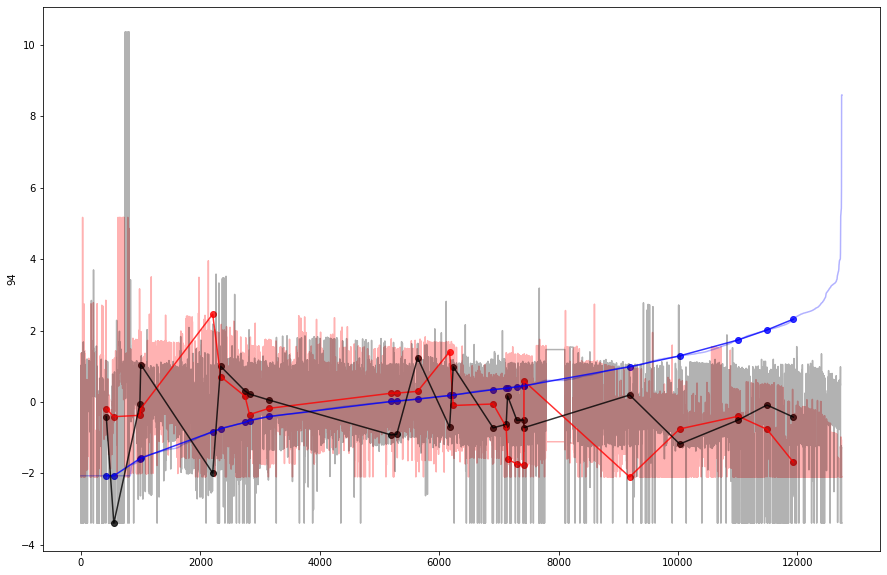

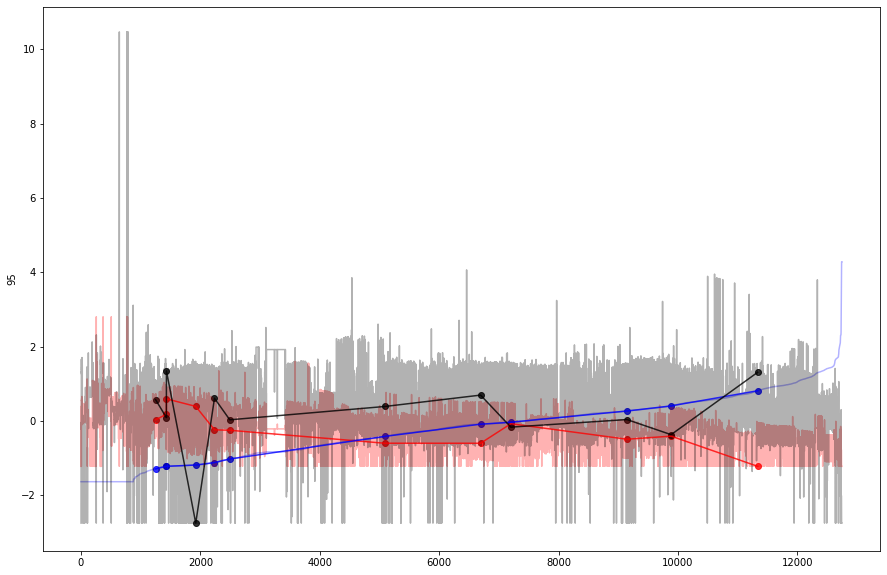

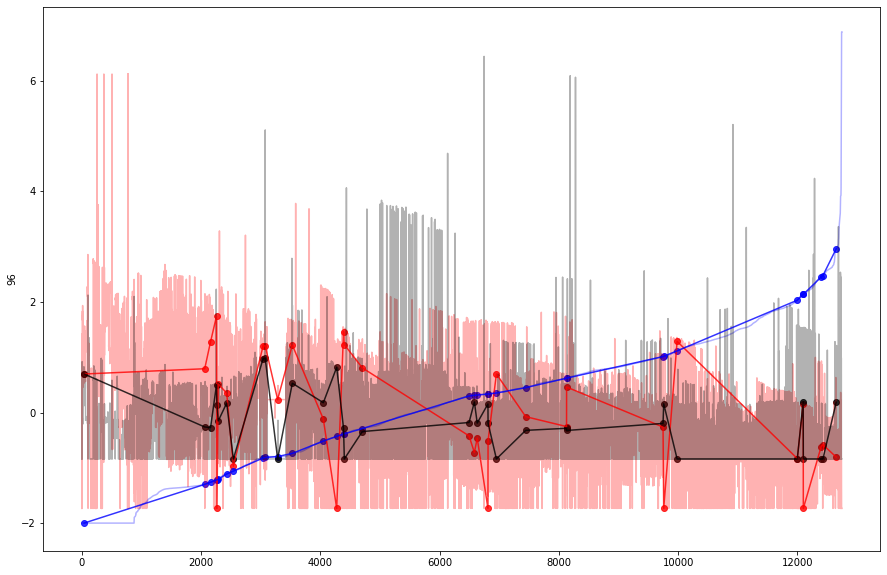

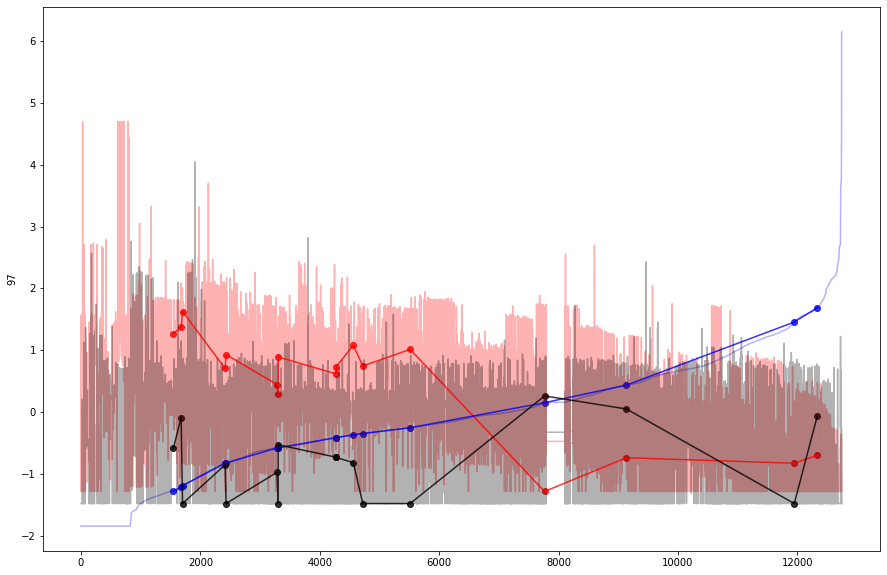

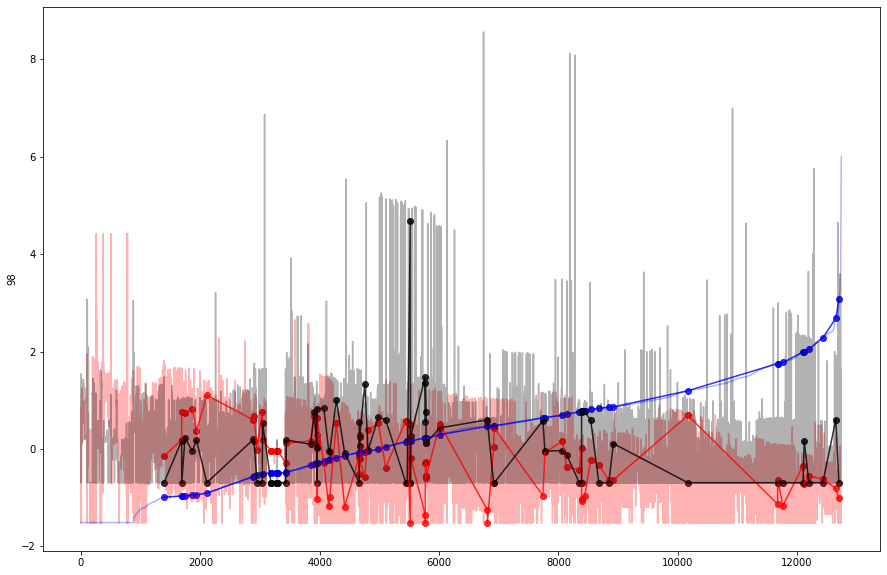

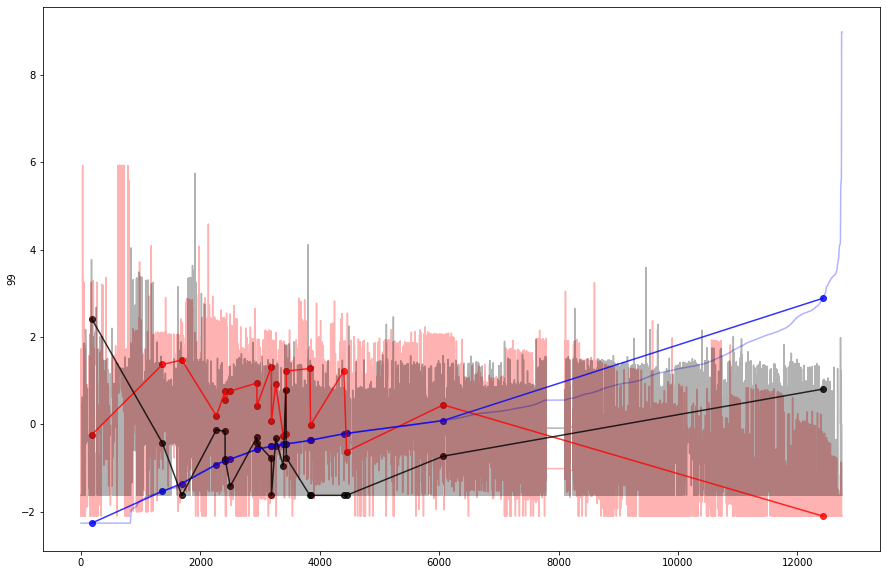

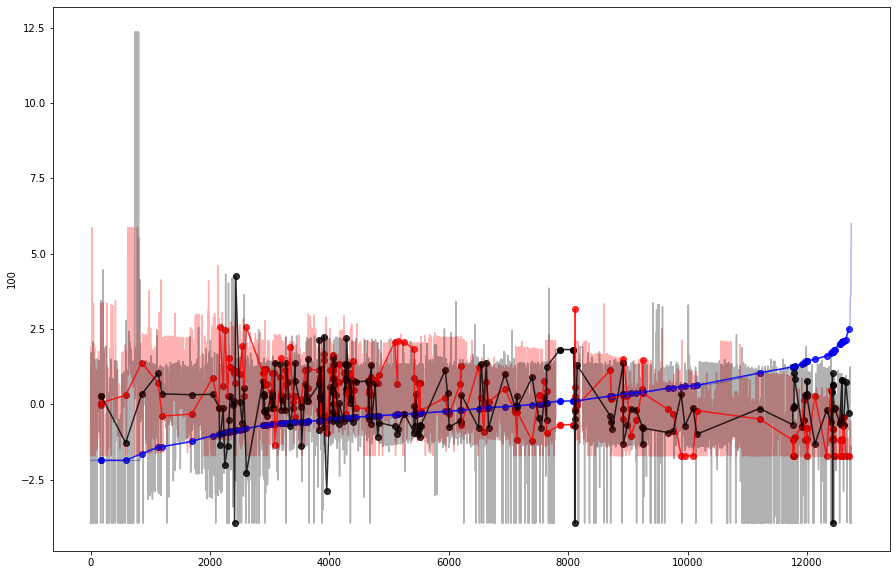

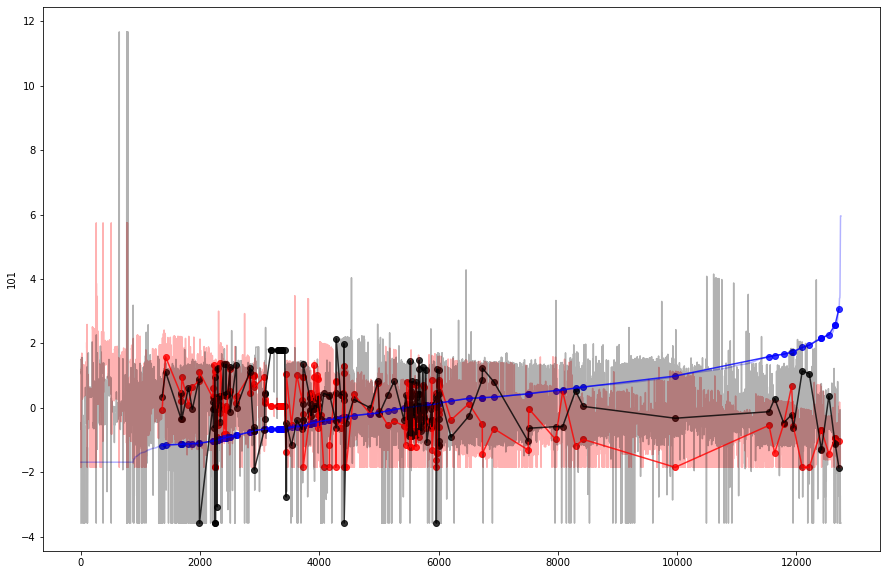

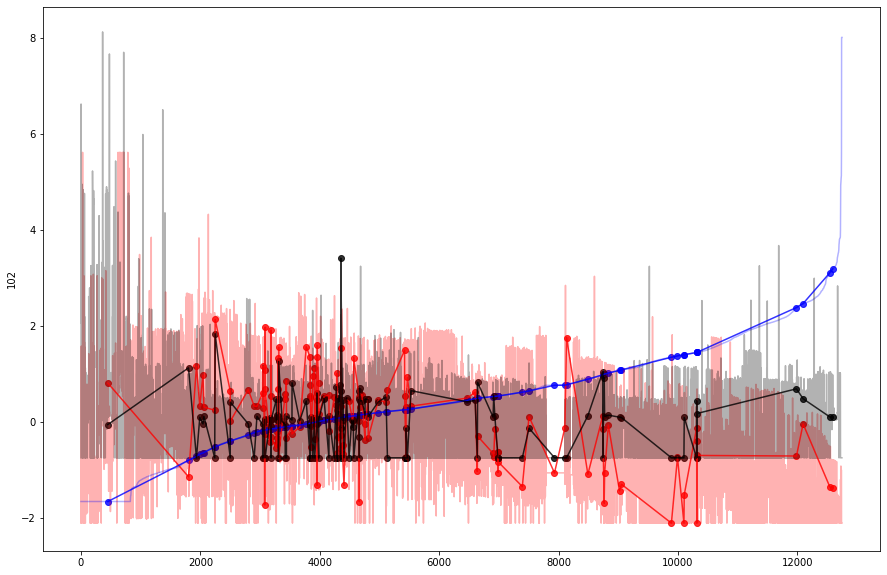

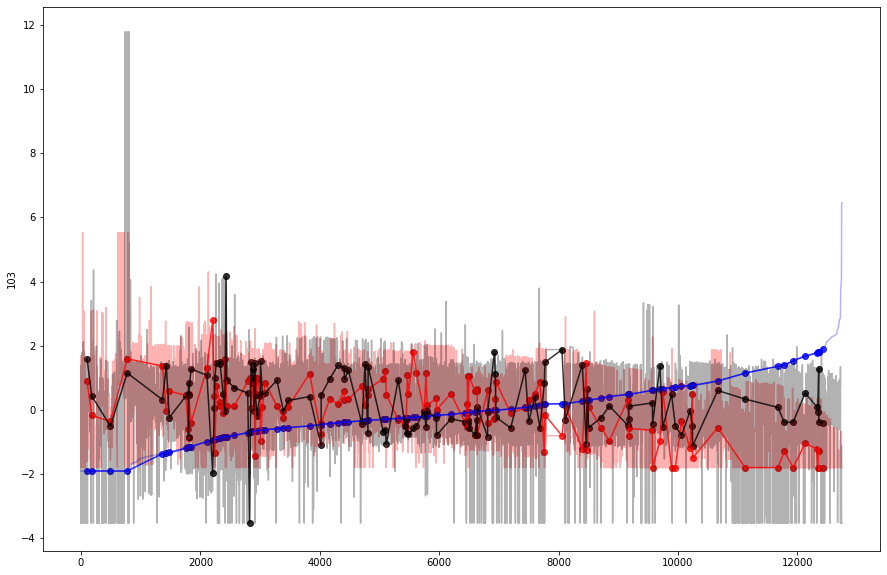

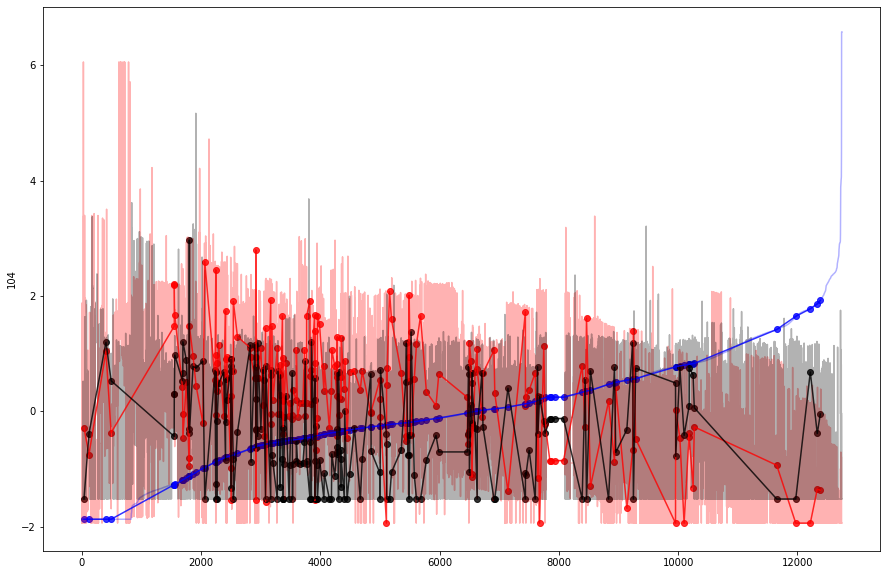

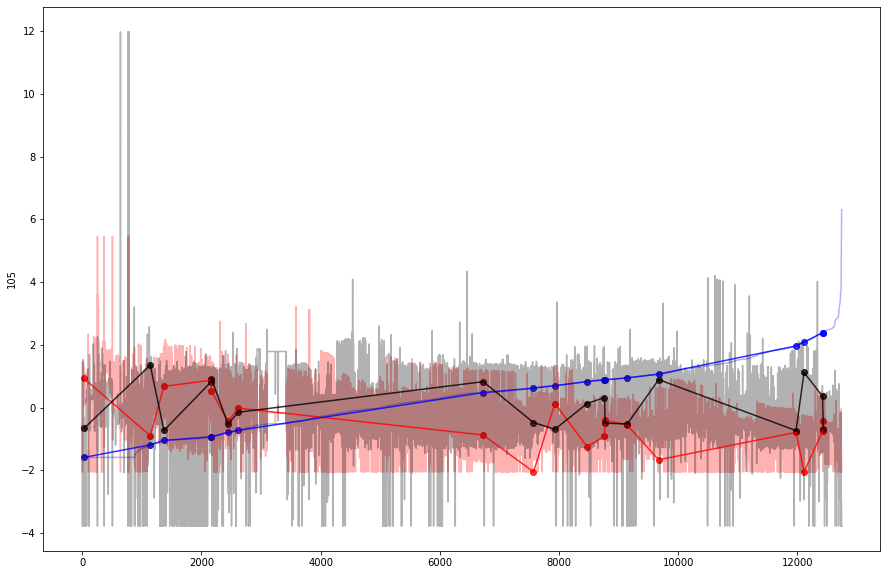

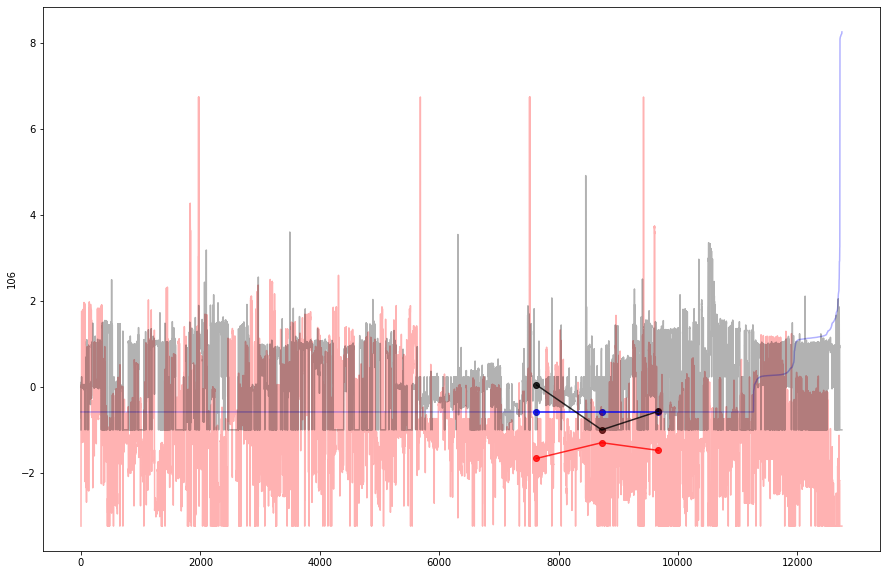

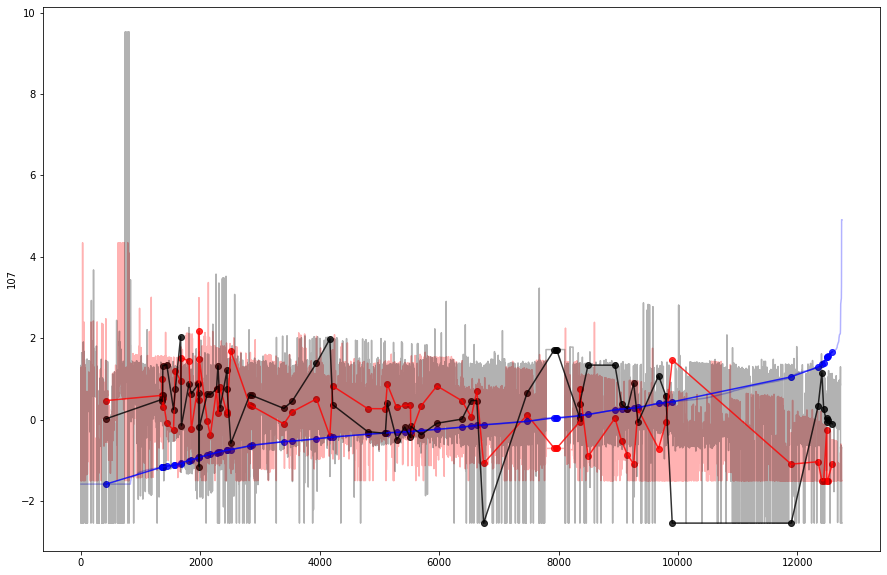

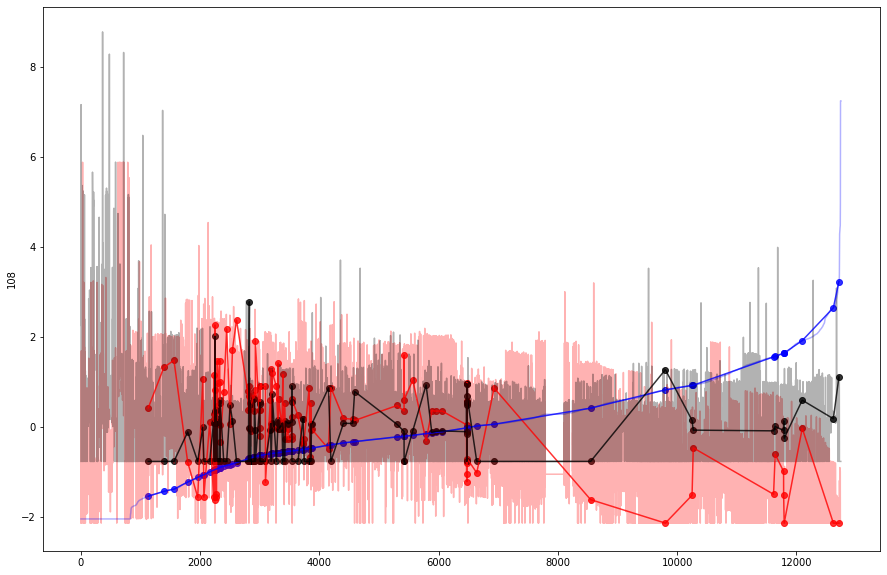

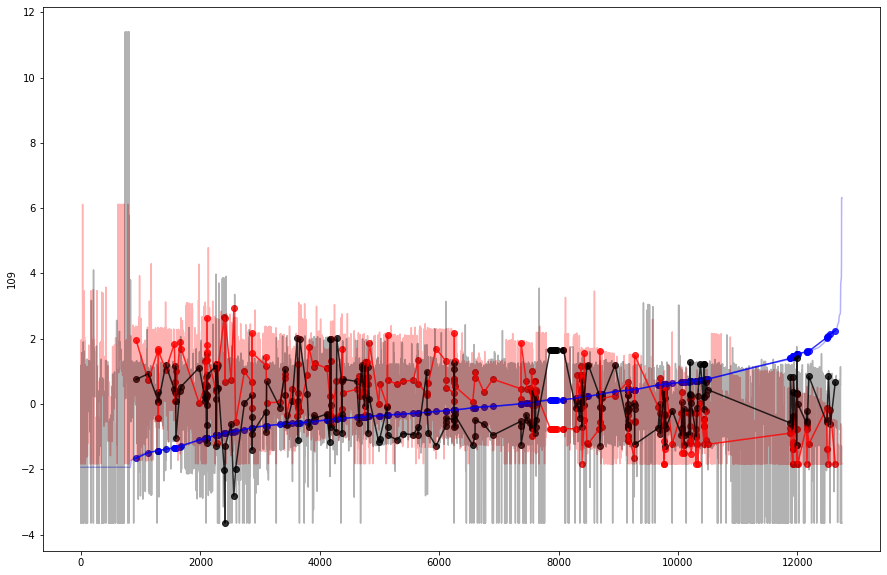

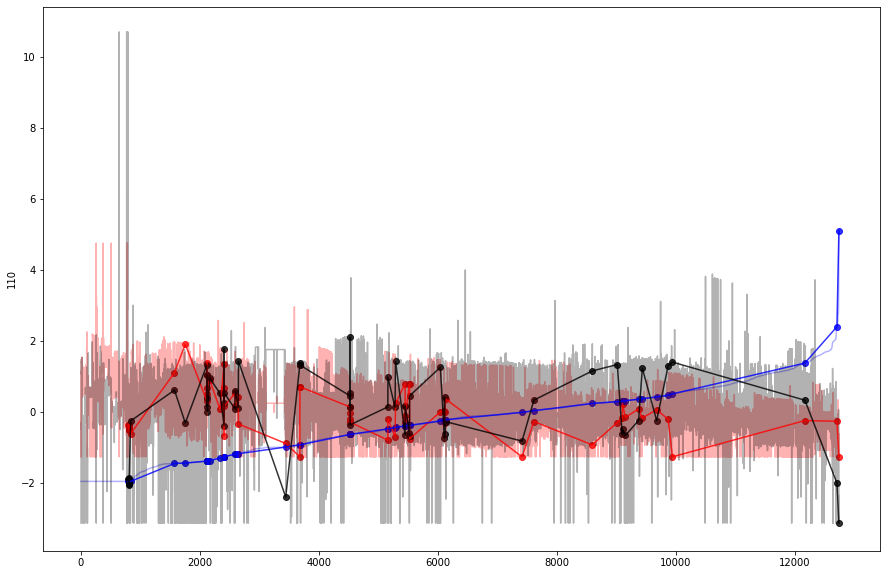

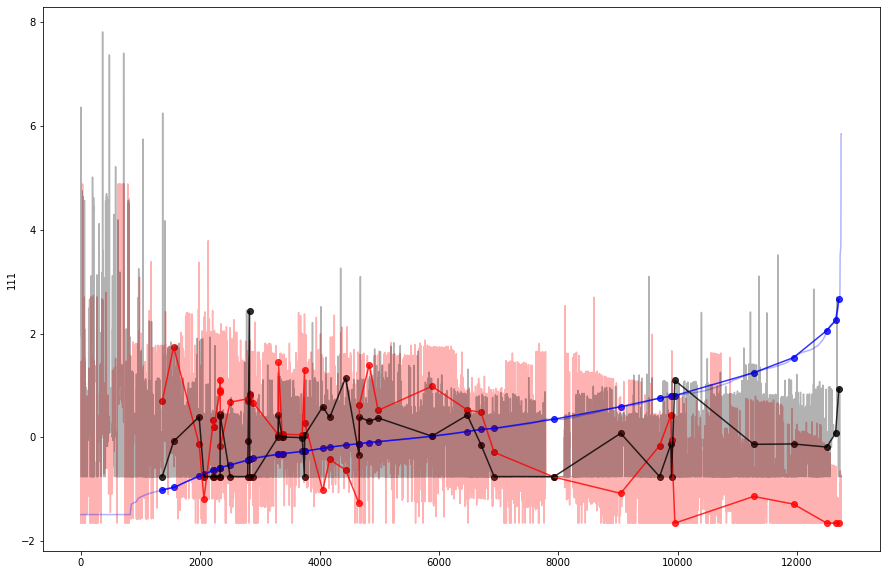

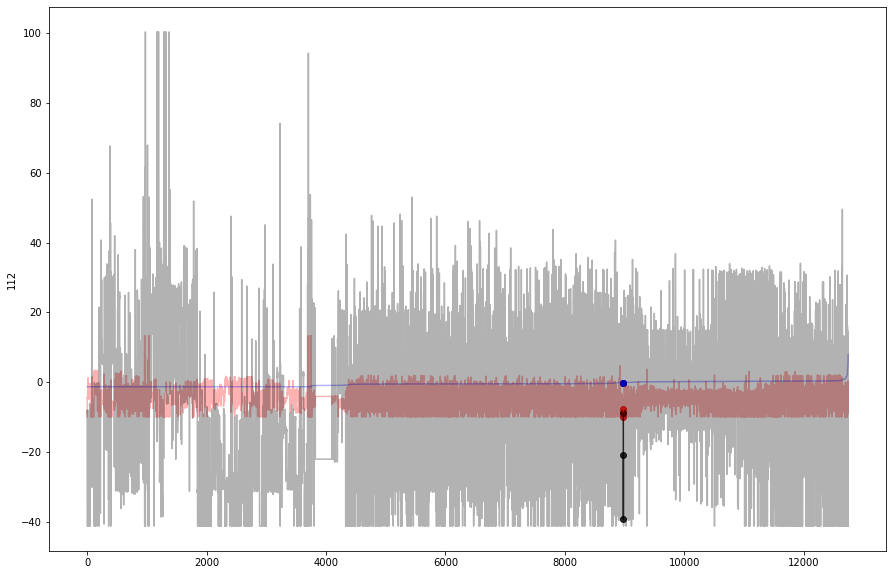

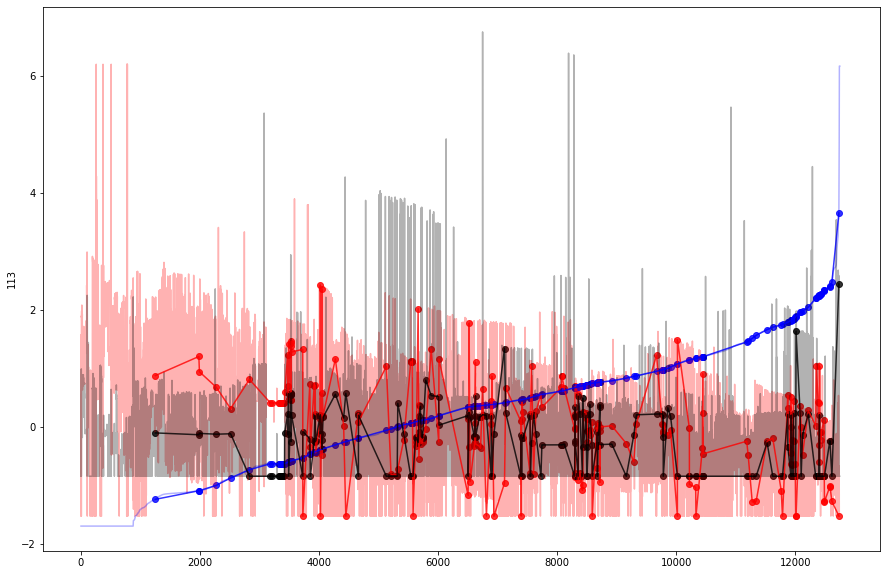

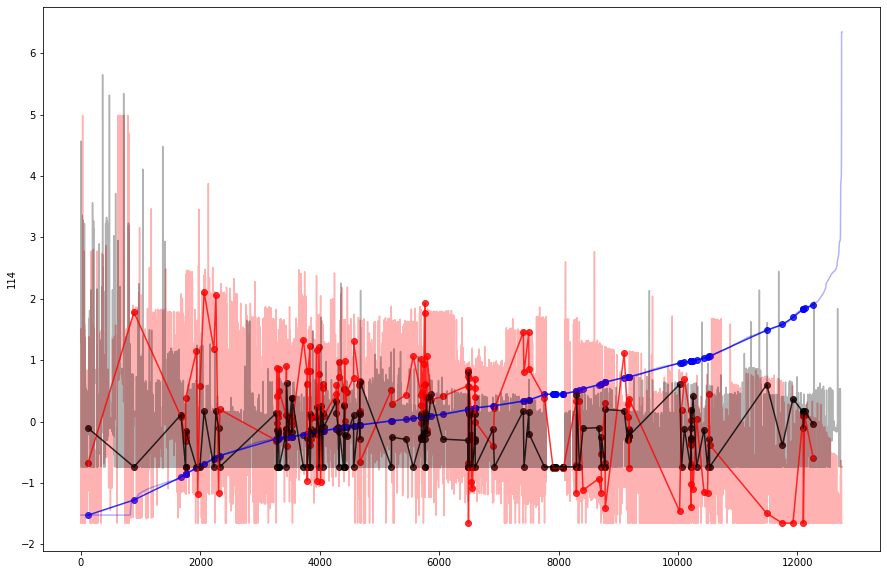

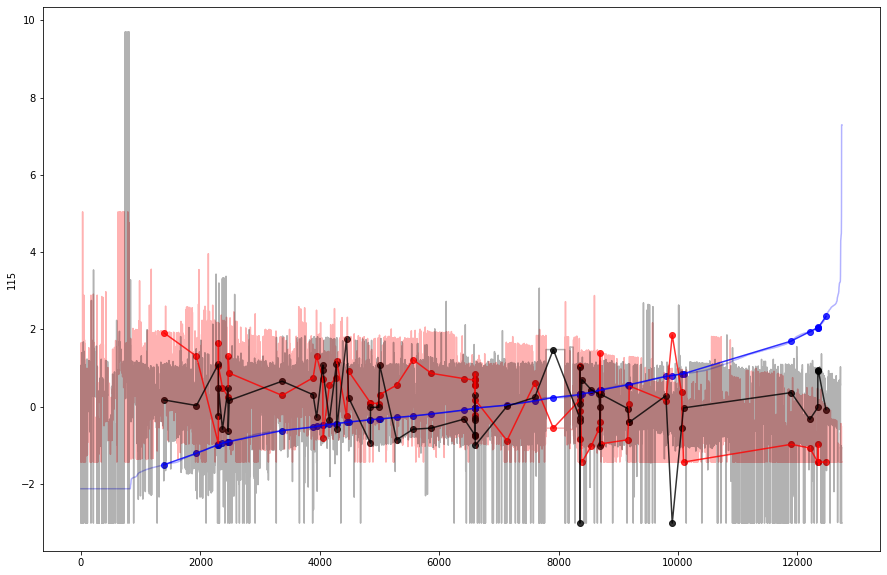

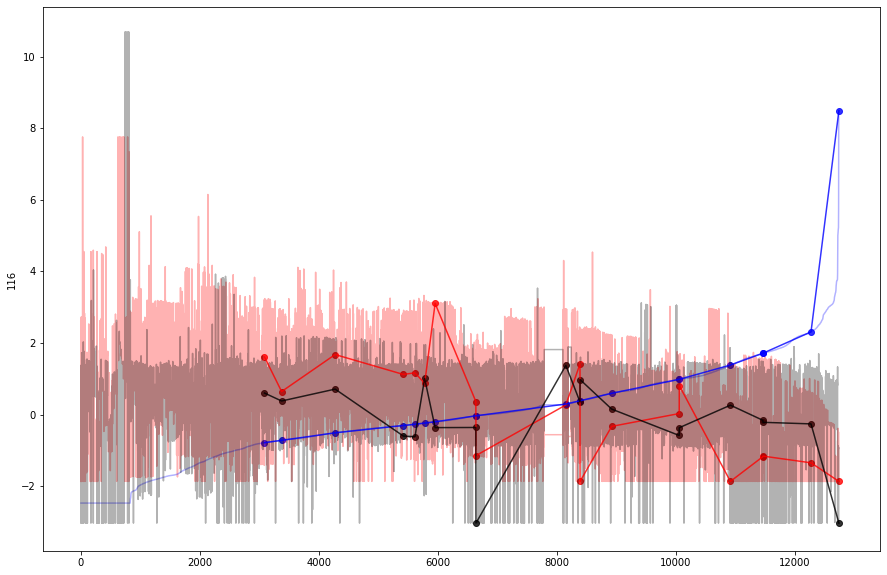

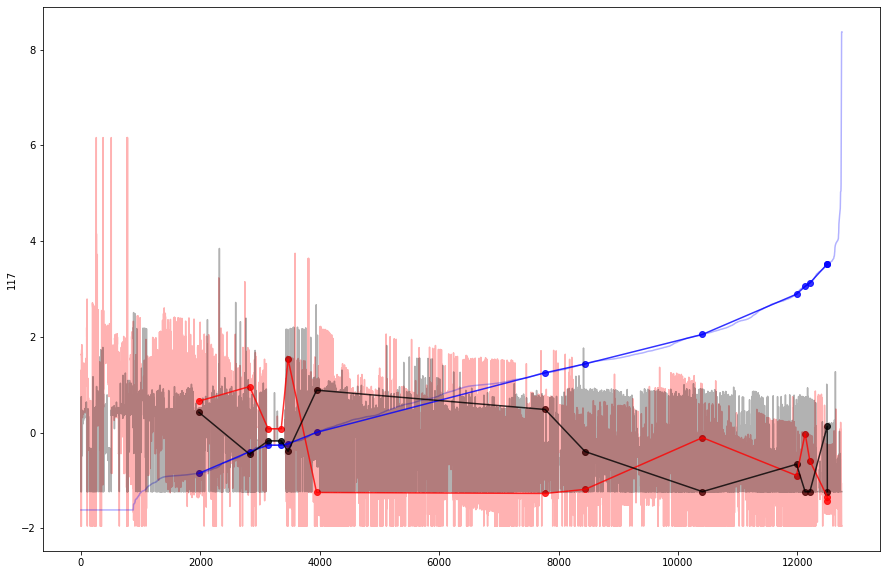

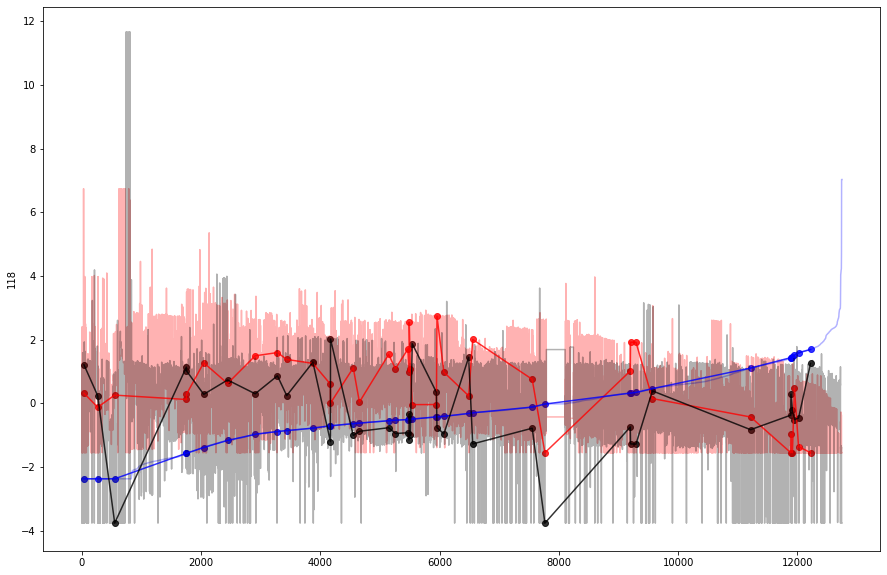

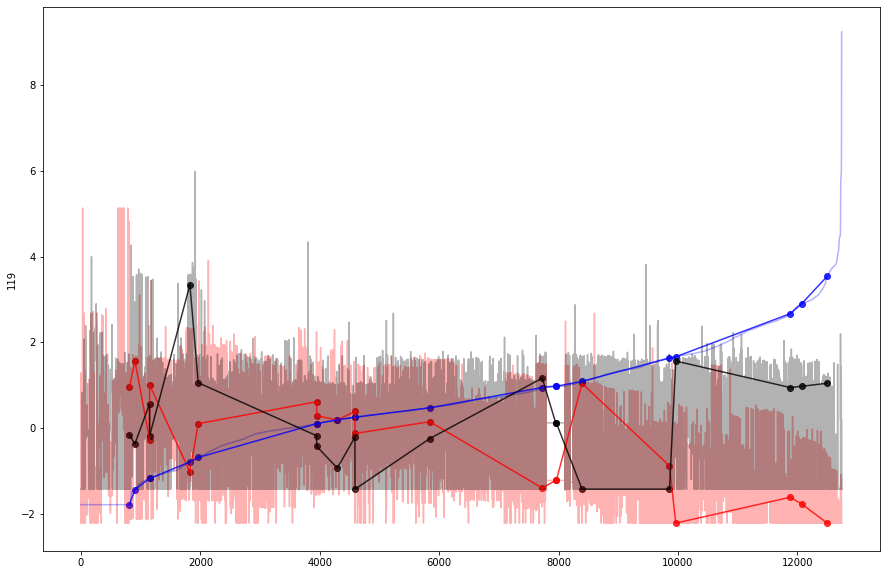

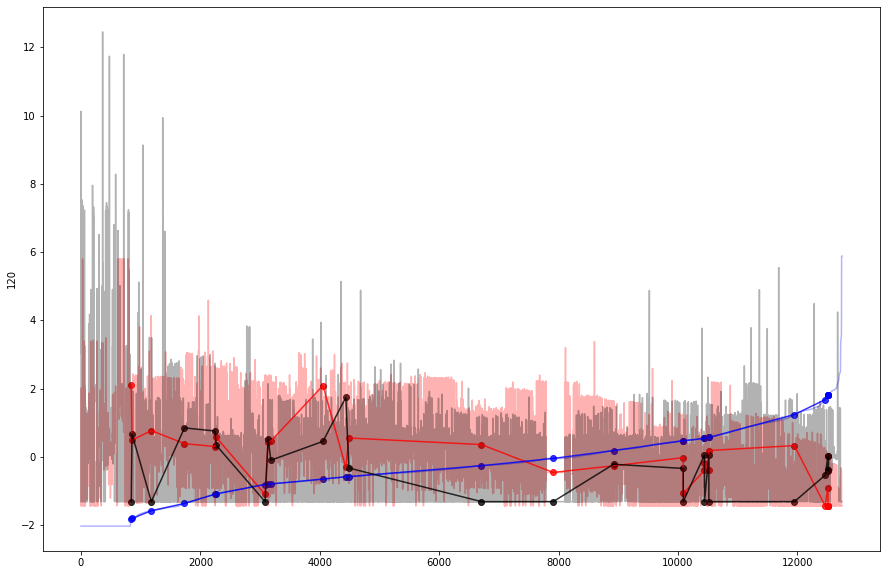

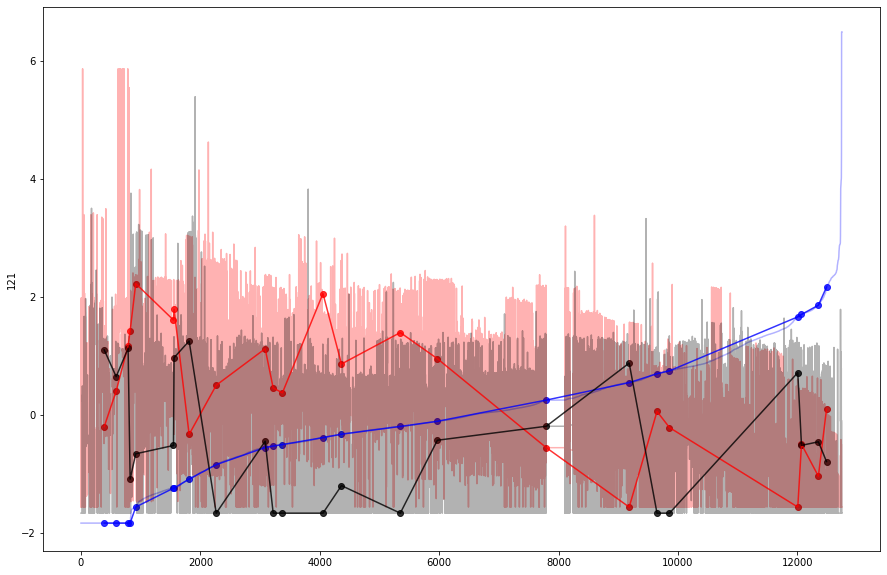

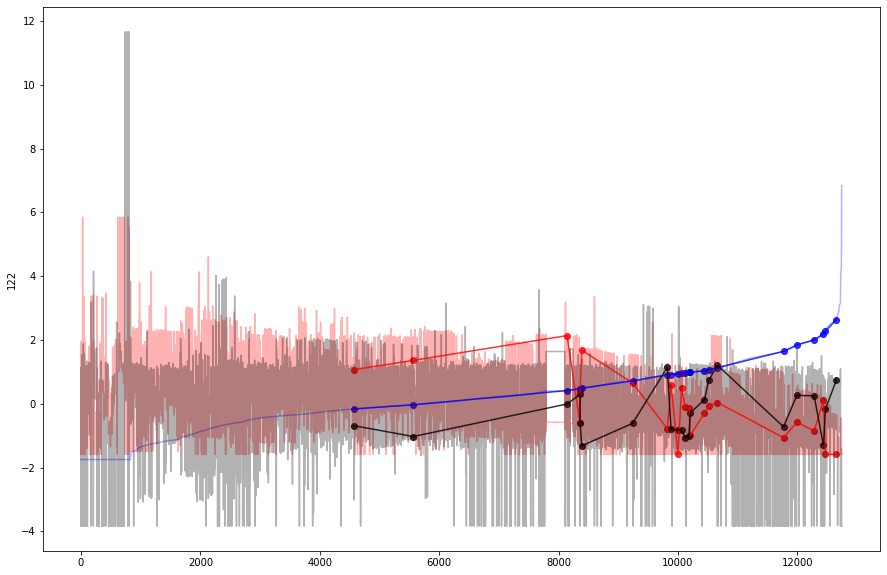

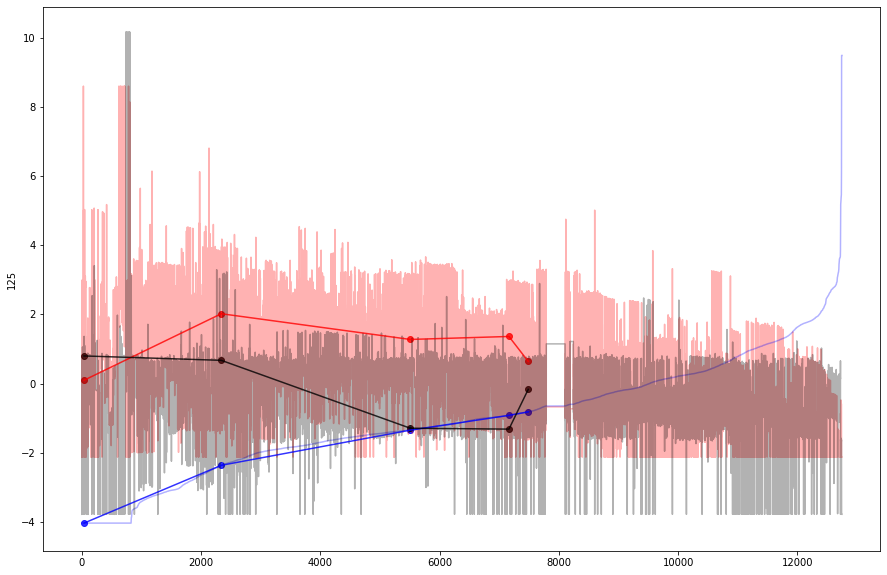

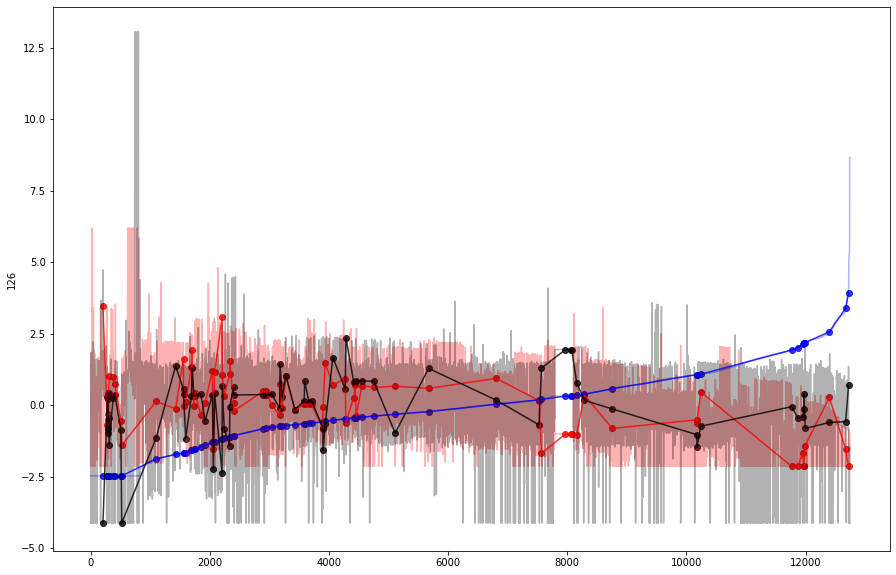

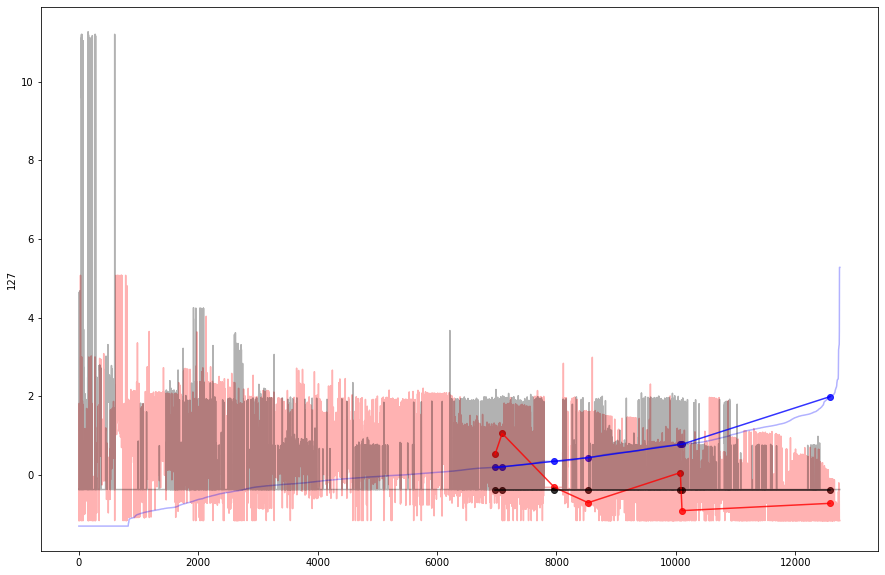

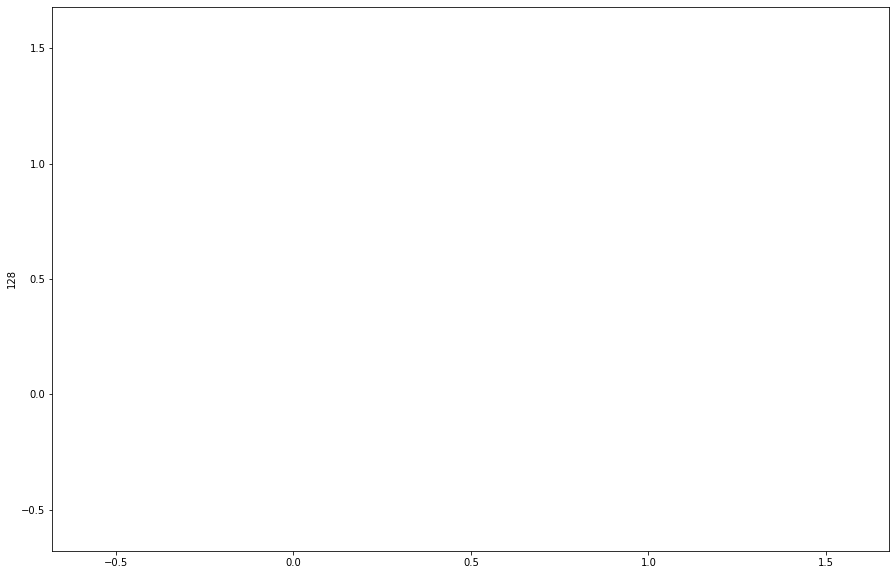

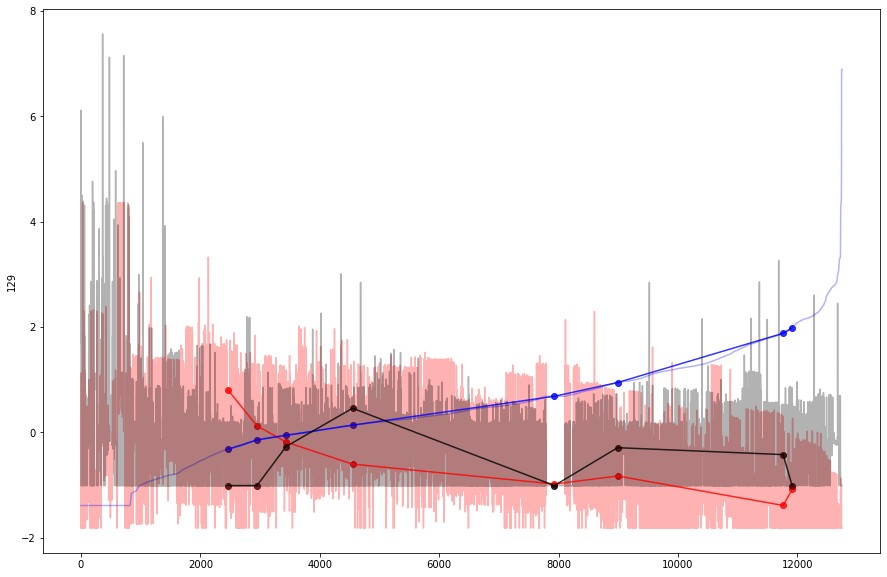

KeyboardInterrupt: 

In [12]:
#нормировка DataR,DataR_test по строкам с дефектами

import pandas as pd
import numpy as np
#np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning':0})
#import collections as col
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

DataR = pd.read_csv('DataR.csv', header = 0, index_col=0)
R_test = pd.read_csv('DataR_test.csv', header = 0, index_col=0)

DataD = pd.read_csv('DataD.csv', header = 0, index_col=0)

for defect in range(len(DataD.columns)):
    D_id=DataD.columns[defect]# id взятого дефекта


    DCol=DataD[D_id] #колонка с наличием/отсутствием дефекта


    DataRTrue=DataR[DCol==1]#берем только дефектные строки. Эта табличка нужна только для вычисления отклонения

    s=list()

    NewR=pd.DataFrame()
    for i in range(len(DataR.columns)):
        M_id = DataR.columns[i]

        RCol = DataR[M_id]
        RColT = DataRTrue[M_id]

        RCol2=RCol-RColT.mean()#вычитаем среднее значение столбца
        if (RColT.std()!=0):
            RCol2=RCol2/RColT.std() #делим на среднеквадратичное отклонение
        RCol2=round(RCol2,5)
        s.append(round(RColT.std(),5))
        NewR[M_id]=RCol2

    S1=pd.Series(s,index=NewR.columns)#среднеквадратические отклонения
    s.clear()

    NewR2=pd.DataFrame()
    for i in range(len(R_test.columns)):
        M_id = R_test.columns[i]

        RCol = R_test[M_id]
        RColT = DataRTrue[M_id]

        RCol2=RCol-RColT.mean()#вычитаем среднее значение столбца
        if(S1[M_id]!=0):
            RCol2=RCol2/S1[M_id]#делим на среднеквадратичное отклонение
        RCol2=round(RCol2,5)

        NewR2[M_id]=RCol2

    NewR.to_csv(r'DataRN.csv',index=True,header=True)
    NewR2.to_csv(r'DataR_testN.csv',index=True,header=True)

    S1.to_csv(r'SR.csv',index=True,header=False)#среднеквадратичное отклонение DataR
    #S2.to_csv(r'SR_test.csv',index=True,header=False)#среднеквадратичное отклонение DataR_test


    DataD = pd.read_csv('DataD.csv', header = 0, index_col=0)
    DataRN = pd.read_csv('DataRN.csv', header = 0, index_col=0)
    R_testN = pd.read_csv('DataR_testN.csv', header = 0, index_col=0)

    S1 = pd.read_csv('SR.csv', index_col=0,header=None).T.iloc[0]
    S2 = pd.read_csv('SR_test.csv', index_col=0,header=None).T.iloc[0]

    S1=S1.sort_values(ascending=False)
    S2=S2.sort_values(ascending=False)
    l1=list()
    l2=list()
    z=3 #сколько у нас анализируется материалов
    for i in range(z):
        l1.append(str(S1.index[i]))
        l2.append(str(S2.index[i]))

    #Датафрейм, в котором лежат 6 наиболее используемых материалов

    Data6=pd.DataFrame(DataRN,columns=l1)
    Data6=Data6.sort_values(by=[Data6.columns[1]])

    #DataDef=Data6[DCol==1]
    #DataDef=DataDef.sort_values(by=[DataDef.columns[0]])
    
    #DataNoDef=Data6[DCol==0]
    #DataNoDef=DataNoDef.sort_values(by=[DataNoDef.columns[0]])
    
    Data6.index=range(len(Data6.index))
    
    index0=list()
    index1=list()
    
          
    DCol=DataD[D_id].tolist()
    
        
    for i in range(len(Data6.index)):
        if(DCol[i]==0):
            index0.append(int(Data6.index[i]))
        else:
            index1.append(int(Data6.index[i]))
    #print(index1)
    
    frame0=pd.DataFrame(Data6,index=index0,columns=Data6.columns)
    frame1=pd.DataFrame(Data6,index=index1,columns=Data6.columns)
            
    #index0=Data6.index[Data6[DCol==0]].tolist()
    #index1=Data6.index[Data6[DCol==1]].tolist()

    #Визуализация
    plt.figure(figsize=(15,10))
    colors = ['red', 'blue', 'black', 'pink','green','orange']
    
    k=0
    for j in Data6.columns:
        if(k>z): k=0
        plt.plot(frame0.index,frame0[j],alpha=0.3,color=colors[k])
        plt.ylabel(D_id)
        k+=1
    k=0
    for j in Data6.columns:
        if(k>z): k=0
        plt.plot(frame1.index.tolist(),frame1[j],alpha=0.8,color=colors[k])
        plt.scatter(frame1.index.tolist(),frame1[j],alpha=0.8,color=colors[k])
        plt.ylabel(D_id)
        k+=1
    plt.show()
    index0.clear()
    index1.clear()
    
    
   